# Deep Learning Fundamentals: From Basics to Neural Networks

This notebook provides a comprehensive introduction to deep learning concepts, starting from the very basics. This foundation is essential for understanding Variational Autoencoders (VAEs).

## Why This Journey Matters

Before diving into the sophisticated world of Variational Autoencoders, we need to build a solid foundation. Think of this as constructing a skyscraper - without a strong foundation, the entire structure will collapse. Here's why each concept matters:

**The Big Picture**: Machine Learning is fundamentally about finding patterns in data and making predictions. Traditional machine learning algorithms work well for many problems, but they struggle with:
- High-dimensional data (images, text, audio)
- Complex, non-linear relationships
- Raw, unstructured data

**Enter Deep Learning**: Neural networks, inspired by the human brain, can automatically learn hierarchical representations of data. They excel at:
- Feature extraction (finding relevant patterns automatically)
- Handling non-linearity (real-world relationships are rarely linear)
- Scaling with data (more data = better performance)

**The Path to VAEs**: Understanding basic neural networks → autoencoders → generative models → VAEs

## Learning Objectives
By the end of this notebook, you will:
- **Conceptually understand** what neural networks are and why they work
- **Mathematically grasp** backpropagation and gradient descent
- **Practically implement** basic networks in PyTorch
- **Critically analyze** different activation functions and their trade-offs
- **Visualize and interpret** network architectures and training dynamics
- **Build intuition** for why deep learning works for complex problems

## The Learning Philosophy
We'll follow a three-pronged approach:
1. **Intuition First**: Understanding the 'why' before the 'how'
2. **Mathematical Rigor**: Building precise understanding with equations
3. **Practical Implementation**: Seeing concepts come alive in code

## References and Further Reading
- [Deep Learning Book by Ian Goodfellow](https://www.deeplearningbook.org/) - The mathematical bible of deep learning
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/) - Excellent intuitive explanations
- [PyTorch Tutorials](https://pytorch.org/tutorials/) - Hands-on implementation guides
- [3Blue1Brown Neural Networks Series](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - Visual intuitions
- [CS231n Stanford Course](http://cs231n.stanford.edu/) - Comprehensive computer vision and deep learning

In [13]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import seaborn as sns

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")

Libraries imported successfully!
PyTorch version: 2.5.1+cu121


## 1. What is a Neural Network? The Biological Inspiration and Mathematical Reality

### The Biological Motivation: Why Look to the Brain?

The human brain is the most sophisticated information processing system we know. Consider these remarkable facts:
- **86 billion neurons** working in parallel
- Each neuron connects to **~7,000 other neurons** on average
- **Learning and adaptation** happen continuously
- **Pattern recognition** that surpasses any computer (recognizing faces, understanding speech)

**Key Insight**: The brain doesn't store information like a computer's hard drive. Instead, knowledge emerges from the **connections and interactions** between simple processing units (neurons).

### Biological vs. Artificial Neurons: The Analogy and Its Limits

**Biological Neuron Process**:
1. **Dendrites** receive chemical signals (neurotransmitters) from other neurons
2. **Cell body (soma)** integrates these signals
3. If the combined signal exceeds a threshold, the neuron **fires**
4. **Axon** transmits the electrical signal to other neurons
5. **Synapses** control the strength of connections between neurons

**Artificial Neuron Process**:
1. **Inputs** (x₁, x₂, ..., xₙ) receive numerical values
2. **Weights** (w₁, w₂, ..., wₙ) control the importance of each input
3. **Summation** combines weighted inputs plus a bias term
4. **Activation function** determines if/how the neuron "fires"
5. **Output** passes to the next layer

### The Mathematical Foundation: Why This Simple Model Works

**The Core Equation**:
```
z = Σ(wᵢ × xᵢ) + b
output = f(z)
```

**Why this matters**:
- **Linear Combination**: The weighted sum captures how different inputs contribute
- **Bias Term**: Allows the neuron to fire even when all inputs are zero
- **Activation Function**: Introduces non-linearity (crucial for complex patterns)

**Geometric Interpretation**:
- Each neuron defines a **hyperplane** in input space
- The weights determine the **orientation** of this hyperplane
- The bias determines the **position** (distance from origin)
- The activation function determines **how sharply** the neuron responds

### Why Individual Neurons Are Limited

A single neuron can only:
- Learn **linear decision boundaries** (without activation function)
- Solve **linearly separable** problems
- Represent **simple logical operations** (AND, OR, but not XOR)

**Historical Context**: The "Perceptron" (single neuron) was initially thought to be very powerful, but Minsky & Papert (1969) showed its fundamental limitations, leading to the first "AI Winter."

### The Power of Networks: Why More Neurons Change Everything

**Universal Approximation Theorem**: A neural network with:
- At least **one hidden layer**
- **Sufficient neurons** in that layer  
- **Non-linear activation functions**

Can approximate **any continuous function** to arbitrary precision!

**What this means practically**:
- Networks can learn **any pattern** that exists in data
- The challenge shifts from "can we learn it?" to "how much data and computation do we need?"
- Multiple layers allow **hierarchical feature learning**

Let's visualize this fundamental building block:

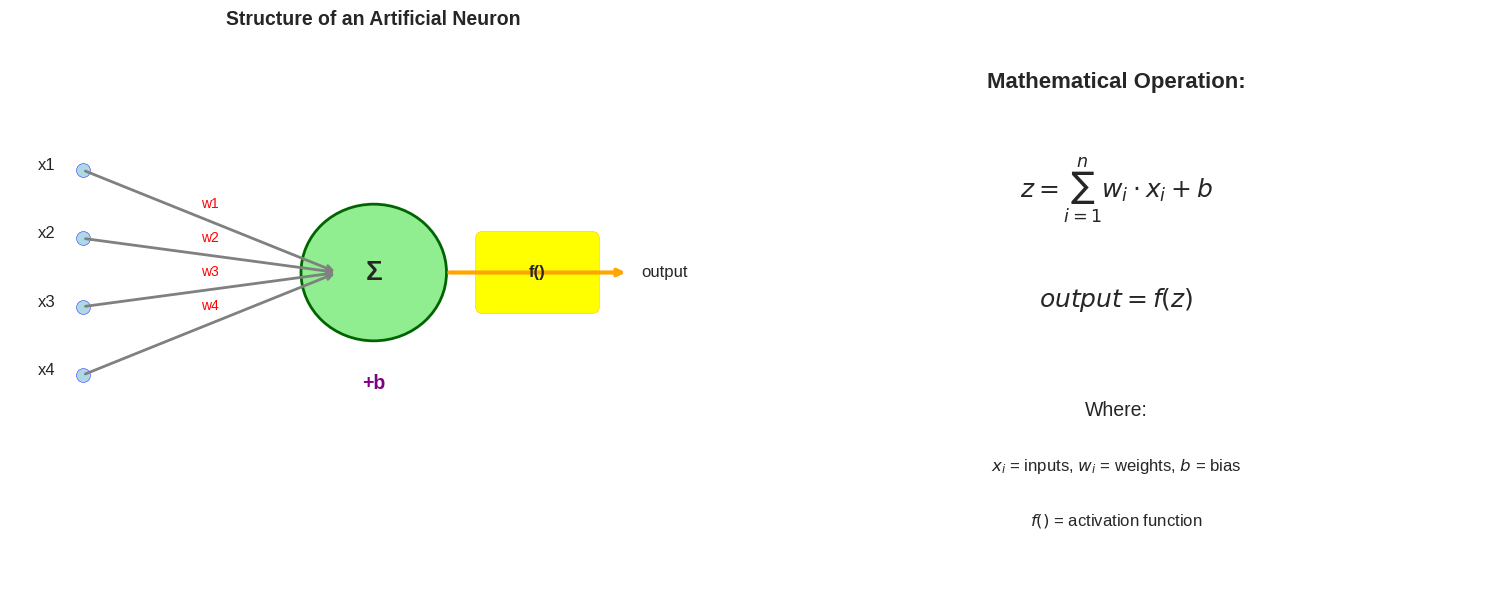

In [6]:
def visualize_neuron():
    """Visualize a single artificial neuron"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left plot: Neuron structure
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 8)
    
    # Draw inputs
    input_positions = [(1, 6), (1, 5), (1, 4), (1, 3)]
    for i, pos in enumerate(input_positions):
        ax1.scatter(*pos, s=100, c='lightblue', edgecolors='blue')
        ax1.text(pos[0]-0.5, pos[1], f'x{i+1}', fontsize=12, ha='center')
        # Draw arrows to neuron
        ax1.annotate('', xy=(4.5, 4.5), xytext=pos, 
                    arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
        # Add weight labels
        ax1.text((pos[0]+4.5)/2, (pos[1]+4.5)/2 + 0.2, f'w{i+1}', 
                fontsize=10, ha='center', color='red')
    
    # Draw neuron (circle)
    circle = plt.Circle((5, 4.5), 1, color='lightgreen', ec='darkgreen', linewidth=2)
    ax1.add_patch(circle)
    ax1.text(5, 4.5, 'Σ', fontsize=20, ha='center', va='center', weight='bold')
    
    # Draw bias
    ax1.text(5, 2.8, '+b', fontsize=14, ha='center', weight='bold', color='purple')
    
    # Draw output
    ax1.annotate('', xy=(8.5, 4.5), xytext=(6, 4.5), 
                arrowprops=dict(arrowstyle='->', lw=3, color='orange'))
    ax1.text(9, 4.5, 'output', fontsize=12, ha='center', va='center')
    
    # Draw activation function box
    rect = FancyBboxPatch((6.5, 4), 1.5, 1, boxstyle="round,pad=0.1", 
                         facecolor='yellow', edgecolor='orange')
    ax1.add_patch(rect)
    ax1.text(7.25, 4.5, 'f()', fontsize=12, ha='center', va='center', weight='bold')
    
    ax1.set_title('Structure of an Artificial Neuron', fontsize=14, weight='bold')
    ax1.axis('off')
    
    # Right plot: Mathematical representation
    ax2.text(0.5, 0.9, 'Mathematical Operation:', fontsize=16, weight='bold', 
             ha='center', transform=ax2.transAxes)
    
    ax2.text(0.5, 0.7, r'$z = \sum_{i=1}^{n} w_i \cdot x_i + b$', 
             fontsize=18, ha='center', transform=ax2.transAxes)
    
    ax2.text(0.5, 0.5, r'$output = f(z)$', 
             fontsize=18, ha='center', transform=ax2.transAxes)
    
    ax2.text(0.5, 0.3, 'Where:', fontsize=14, ha='center', transform=ax2.transAxes)
    ax2.text(0.5, 0.2, r'$x_i$ = inputs, $w_i$ = weights, $b$ = bias', 
             fontsize=12, ha='center', transform=ax2.transAxes)
    ax2.text(0.5, 0.1, r'$f()$ = activation function', 
             fontsize=12, ha='center', transform=ax2.transAxes)
    
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_neuron()

## 2. Activation Functions: The Key to Non-Linearity and Learning

### The Fundamental Problem: Why Linear Models Fail

**Imagine trying to separate these points**:
- Class A: (1,1), (-1,-1)
- Class B: (1,-1), (-1,1)

No single straight line can separate these classes! This is the **XOR problem** that plagued early AI.

**Mathematical Reality**: Without activation functions, a neural network with multiple layers is equivalent to a single layer:
```
f(x) = W₃(W₂(W₁x + b₁) + b₂) + b₃
     = (W₃W₂W₁)x + (W₃W₂b₁ + W₃b₂ + b₃)
     = Wx + b  # Just a linear transformation!
```

**The Solution**: Non-linear activation functions break this limitation, allowing networks to:
- Learn **curved decision boundaries**
- Approximate **any non-linear function**
- Capture **complex patterns** in data

### Historical Evolution: From Biological Inspiration to Mathematical Optimization

**1943 - McCulloch-Pitts Neuron**: Binary threshold function
```
f(x) = 1 if x ≥ threshold, 0 otherwise
```
*Problem*: Not differentiable, can't use gradient descent

**1960s - Sigmoid Revolution**: Smooth, differentiable approximation
```
σ(x) = 1/(1 + e^(-x))
```
*Advantage*: Differentiable everywhere, outputs probabilities
*Problem*: Vanishing gradients in deep networks

**1980s - Tanh**: Zero-centered improvement
```
tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))
```
*Advantage*: Zero-centered, symmetric around origin
*Problem*: Still suffers from vanishing gradients

**2000s - ReLU Revolution**: Simple yet powerful
```
ReLU(x) = max(0, x)
```
*Breakthrough*: Solved vanishing gradient problem, computationally efficient
*Enabled*: Training of very deep networks

### Deep Dive: Understanding Each Activation Function

#### 1. Sigmoid Function: The Smooth Switch

**Mathematical Properties**:
- **Range**: (0, 1) - always positive
- **Monotonic**: Always increasing
- **Differentiable**: σ'(x) = σ(x)(1 - σ(x))
- **Asymptotic**: Approaches 0 and 1 at extremes

**Intuitive Understanding**:
- Acts like a "soft switch" - gradually turns on/off
- Output can be interpreted as **probability**
- Saturates (flat regions) for large |x|

**When to Use**:
- **Output layer** for binary classification
- When you need **probability outputs**
- **Historical**: Used in hidden layers before ReLU

**Problems**:
- **Vanishing Gradients**: In deep networks, gradients become exponentially small
- **Not Zero-Centered**: All outputs are positive, causing inefficient learning
- **Computationally Expensive**: Exponential function

#### 2. Tanh Function: The Balanced Sigmoid

**Mathematical Properties**:
- **Range**: (-1, 1) - centered around zero
- **Relationship to Sigmoid**: tanh(x) = 2σ(2x) - 1
- **Derivative**: tanh'(x) = 1 - tanh²(x)
- **Odd Function**: tanh(-x) = -tanh(x)

**Advantages over Sigmoid**:
- **Zero-centered**: Outputs can be positive or negative
- **Stronger gradients**: Derivative peaks at 1 (vs 0.25 for sigmoid)
- **Better convergence**: Due to zero-centered nature

**Still has problems**:
- **Vanishing gradients** in very deep networks
- **Computational cost** of exponential functions

#### 3. ReLU: The Game Changer

**Mathematical Properties**:
- **Range**: [0, ∞) - unbounded above
- **Derivative**: 1 if x > 0, 0 if x < 0
- **Sparsity**: Many neurons output exactly 0
- **Linear**: In positive region, preserves gradients

**Why ReLU Works So Well**:
1. **Gradient Flow**: No vanishing gradient problem for positive inputs
2. **Computational Efficiency**: Just max(0, x) - no exponentials
3. **Biological Plausibility**: Neurons either fire or don't
4. **Sparsity**: Creates sparse representations (many zeros)
5. **Infinite Upper Bound**: Doesn't saturate for large positive values

**The "Dying ReLU" Problem**:
- If a neuron's output is always negative, it will never activate
- Gradient is always 0, so weights never update
- Neuron becomes "dead" and never recovers
- **Solution**: Proper weight initialization and learning rates

#### 4. Leaky ReLU: Fixing the Dying Problem

**Mathematical Properties**:
- **Formula**: LeakyReLU(x) = max(αx, x) where α ≈ 0.01
- **Small negative slope**: Prevents complete "death"
- **Maintains advantages**: Of ReLU while fixing dying problem

**Variants and Modern Improvements**:
- **ELU**: Exponential Linear Unit - smooth transition
- **Swish**: x × sigmoid(x) - smooth, self-gated
- **GELU**: Gaussian Error Linear Unit - probabilistically motivated

### Choosing the Right Activation Function: A Practical Guide

**For Hidden Layers**:
- **Default choice**: ReLU (simple, effective)
- **If dying ReLU is a problem**: Leaky ReLU or ELU
- **For very deep networks**: Consider modern variants (Swish, GELU)
- **Legacy/research**: Tanh (still valid, especially in RNNs)

**For Output Layers**:
- **Binary classification**: Sigmoid
- **Multi-class classification**: Softmax
- **Regression**: Linear (no activation) or ReLU if outputs should be positive
- **Probabilistic outputs**: Sigmoid or Softmax

### The Mathematical Impact on Learning

**Gradient Flow Analysis**:
- **Chain Rule**: ∂L/∂w = ∂L/∂y × ∂y/∂z × ∂z/∂w
- **Activation derivative**: ∂y/∂z affects gradient magnitude
- **Sigmoid**: Max derivative = 0.25 (gradients shrink by 75%)
- **ReLU**: Derivative = 1 (gradients preserved)

**This explains**:
- Why **deep sigmoid networks** train slowly
- Why **ReLU enabled** training of 100+ layer networks
- Why **proper activation choice** is crucial for deep learning success

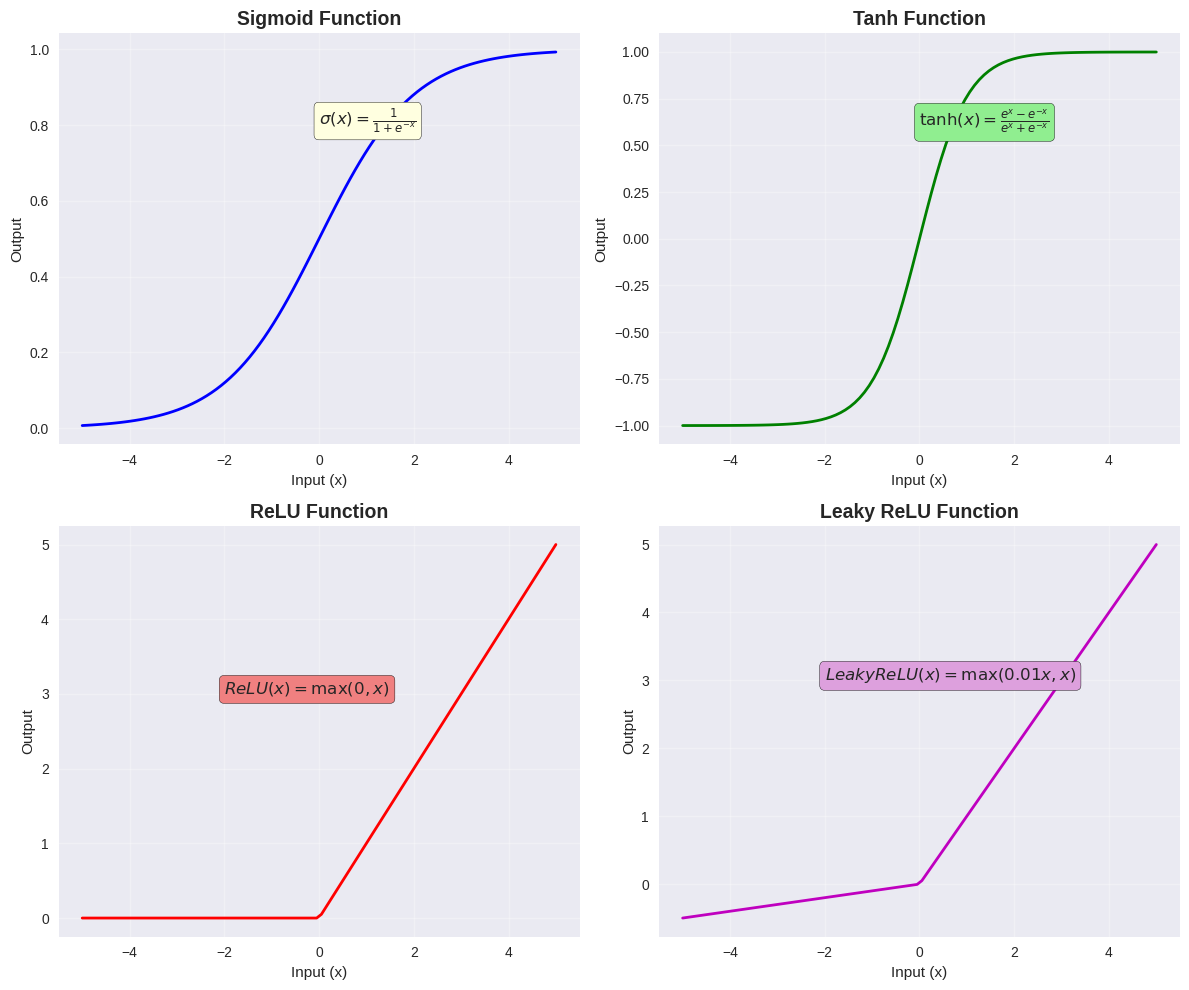

Activation Function Properties:
Sigmoid:
  - Range: (0, 1)
  - Smooth, differentiable
  - Vanishing gradient problem for large |x|
  - Good for binary classification output

Tanh:
  - Range: (-1, 1)
  - Zero-centered (better than sigmoid)
  - Still suffers from vanishing gradients

ReLU:
  - Range: [0, ∞)
  - Computationally efficient
  - Solves vanishing gradient problem
  - Can have 'dying ReLU' problem

Leaky ReLU:
  - Range: (-∞, ∞)
  - Prevents dying ReLU problem
  - Small negative slope for x < 0


In [7]:
def plot_activation_functions():
    """Plot common activation functions"""
    x = torch.linspace(-5, 5, 100)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    # Sigmoid
    sigmoid = torch.sigmoid(x)
    axes[0].plot(x, sigmoid, 'b-', linewidth=2, label='Sigmoid')
    axes[0].set_title('Sigmoid Function', fontsize=14, weight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlabel('Input (x)')
    axes[0].set_ylabel('Output')
    axes[0].text(0, 0.8, r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
    
    # Tanh
    tanh = torch.tanh(x)
    axes[1].plot(x, tanh, 'g-', linewidth=2, label='Tanh')
    axes[1].set_title('Tanh Function', fontsize=14, weight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlabel('Input (x)')
    axes[1].set_ylabel('Output')
    axes[1].text(0, 0.6, r'$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    
    # ReLU
    relu = F.relu(x)
    axes[2].plot(x, relu, 'r-', linewidth=2, label='ReLU')
    axes[2].set_title('ReLU Function', fontsize=14, weight='bold')
    axes[2].grid(True, alpha=0.3)
    axes[2].set_xlabel('Input (x)')
    axes[2].set_ylabel('Output')
    axes[2].text(-2, 3, r'$ReLU(x) = \max(0, x)$', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    
    # Leaky ReLU
    leaky_relu = F.leaky_relu(x, 0.1)
    axes[3].plot(x, leaky_relu, 'm-', linewidth=2, label='Leaky ReLU')
    axes[3].set_title('Leaky ReLU Function', fontsize=14, weight='bold')
    axes[3].grid(True, alpha=0.3)
    axes[3].set_xlabel('Input (x)')
    axes[3].set_ylabel('Output')
    axes[3].text(-2, 3, r'$LeakyReLU(x) = \max(0.01x, x)$', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="plum"))
    
    plt.tight_layout()
    plt.show()
    
    # Properties comparison
    print("Activation Function Properties:")
    print("==============================")
    print("Sigmoid:")
    print("  - Range: (0, 1)")
    print("  - Smooth, differentiable")
    print("  - Vanishing gradient problem for large |x|")
    print("  - Good for binary classification output")
    print()
    print("Tanh:")
    print("  - Range: (-1, 1)")
    print("  - Zero-centered (better than sigmoid)")
    print("  - Still suffers from vanishing gradients")
    print()
    print("ReLU:")
    print("  - Range: [0, ∞)")
    print("  - Computationally efficient")
    print("  - Solves vanishing gradient problem")
    print("  - Can have 'dying ReLU' problem")
    print()
    print("Leaky ReLU:")
    print("  - Range: (-∞, ∞)")
    print("  - Prevents dying ReLU problem")
    print("  - Small negative slope for x < 0")

plot_activation_functions()

## 3. Neural Network Architecture: Building Intelligence Layer by Layer

### The Architectural Philosophy: Hierarchical Learning

**Why Layers?** The brain doesn't process information in one step. Consider vision:
1. **Primary Visual Cortex**: Detects edges and orientations
2. **Secondary Areas**: Combine edges into shapes
3. **Higher Areas**: Recognize objects and scenes
4. **Semantic Areas**: Understand meaning and context

**Artificial Networks Mirror This**:
- **Early layers**: Learn simple features (edges, textures)
- **Middle layers**: Combine features into parts (wheels, windows)
- **Deep layers**: Understand complex concepts (cars, buildings)

### Anatomy of a Neural Network: Beyond the Buzzwords

#### Input Layer: The Sensory Interface

**Purpose**: Convert raw data into numerical format the network can process

**Key Considerations**:
- **Dimensionality**: How many features does your data have?
- **Normalization**: Should inputs be scaled to [0,1] or [-1,1]?
- **Representation**: How do you encode categorical data?

**Examples**:
- **Images**: 28×28 = 784 neurons for MNIST digits
- **Text**: Vocabulary size (e.g., 50,000 words)
- **Tabular**: Number of features in your dataset

**Mathematical Representation**:
```
Input vector: x = [x₁, x₂, ..., xₙ]
where n = number of input features
```

#### Hidden Layers: The Thinking Engine

**Purpose**: Transform inputs through learned representations to solve the task

**Depth vs Width Trade-offs**:

**Deep Networks** (many layers, fewer neurons each):
- **Advantages**: 
  - Learn hierarchical features
  - More parameter-efficient
  - Better generalization (often)
- **Challenges**:
  - Harder to train (vanishing gradients)
  - More prone to overfitting
  - Require careful initialization

**Wide Networks** (few layers, many neurons each):
- **Advantages**:
  - Easier to train
  - Less prone to vanishing gradients
- **Challenges**:
  - Less feature hierarchy
  - More parameters needed
  - May overfit with insufficient data

**Modern Insight**: **Depth is often more important than width** for complex tasks

**How Many Hidden Layers?**
- **1 layer**: Linear classification with feature transformation
- **2 layers**: Can approximate any continuous function (universal approximation)
- **3+ layers**: Hierarchical feature learning, better for complex data
- **10+ layers**: "Deep learning" - requires special techniques (ResNet, normalization)

**How Many Neurons per Layer?**
- **Rule of thumb**: Start with 2/3 the size of input + output layers
- **Pyramid structure**: Gradually decrease size toward output
- **Modern approach**: Experiment and use validation loss to guide

#### Output Layer: The Decision Maker

**Purpose**: Convert final hidden representations into task-specific outputs

**Architecture depends on task**:

**Binary Classification**:
- **1 neuron** with sigmoid activation
- Output: Probability of positive class
- Loss: Binary Cross-Entropy

**Multi-class Classification**:
- **k neurons** (k = number of classes) with softmax
- Output: Probability distribution over classes
- Loss: Categorical Cross-Entropy

**Regression**:
- **1 neuron** (or more for multi-target) with linear activation
- Output: Continuous value(s)
- Loss: Mean Squared Error

**Multi-label Classification**:
- **k neurons** with sigmoid (each class independent)
- Output: Independent probabilities for each label
- Loss: Binary Cross-Entropy per label

### Information Flow: The Forward Pass in Detail

**Mathematical Sequence**:
```
Layer 1: h₁ = f₁(W₁x + b₁)
Layer 2: h₂ = f₂(W₂h₁ + b₂)
...
Output: y = f_out(W_out h_last + b_out)
```

**Matrix Perspective**:
- **Input**: x ∈ ℝⁿ (n-dimensional vector)
- **Weight Matrix**: W ∈ ℝᵐ×ⁿ (m neurons, n inputs)
- **Bias Vector**: b ∈ ℝᵐ (one bias per neuron)
- **Output**: h ∈ ℝᵐ (m-dimensional vector)

**Computational Complexity**:
- **Single layer**: O(mn) operations
- **Entire network**: Sum over all layers
- **Why this matters**: Training time scales with network size

### Architectural Patterns: Lessons from Practice

#### Classic Architectures

**Multi-Layer Perceptron (MLP)**:
- **Structure**: Fully connected layers
- **Use cases**: Tabular data, simple classification
- **Pros**: Simple, interpretable
- **Cons**: Doesn't scale to high-dimensional data

**Convolutional Neural Networks (CNNs)**:
- **Structure**: Convolution + pooling layers
- **Use cases**: Images, spatial data
- **Key insight**: Translation invariance and local connectivity

**Recurrent Neural Networks (RNNs)**:
- **Structure**: Feedback connections
- **Use cases**: Sequential data (text, time series)
- **Key insight**: Memory and temporal dependencies

#### Modern Design Principles

**Skip Connections** (ResNet):
- **Problem**: Very deep networks suffer from degradation
- **Solution**: Add shortcuts that skip layers
- **Result**: Can train 1000+ layer networks

**Attention Mechanisms** (Transformers):
- **Problem**: RNNs struggle with long sequences
- **Solution**: Direct connections between any two positions
- **Result**: State-of-the-art in NLP

**Normalization Layers**:
- **Batch Normalization**: Normalize within each batch
- **Layer Normalization**: Normalize within each example
- **Result**: Faster training, better stability

### Design Decisions: The Art and Science

**Network Depth**:
- **Shallow**: Fast training, interpretable, may underfit
- **Deep**: Better features, slower training, may overfit
- **Sweet spot**: Often 3-10 layers for most problems

**Network Width**:
- **Narrow**: Parameter efficient, may underfit
- **Wide**: More capacity, risk of overfitting
- **Modern trend**: Wider networks often generalize better

**Activation Functions**:
- **Hidden layers**: ReLU (default), Leaky ReLU, ELU
- **Output layer**: Task-dependent (sigmoid, softmax, linear)

**Initialization Strategy**:
- **Random**: Can cause vanishing/exploding gradients
- **Xavier/Glorot**: Good for sigmoid/tanh
- **He initialization**: Better for ReLU networks

### Common Architectural Mistakes and Solutions

**Mistake 1**: Making networks too deep too quickly
- **Problem**: Hard to debug, training instability
- **Solution**: Start simple, gradually increase complexity

**Mistake 2**: Ignoring the data characteristics
- **Problem**: Using fully connected layers for images
- **Solution**: Match architecture to data structure

**Mistake 3**: Not considering computational constraints
- **Problem**: Models too large for deployment
- **Solution**: Design with target environment in mind

**Mistake 4**: Focusing only on accuracy
- **Problem**: Models that work in lab but fail in production
- **Solution**: Consider interpretability, fairness, robustness

Let's visualize these concepts to make them concrete:

/tmp/ipykernel_275/2936413901.py:66: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_275/2936413901.py:66: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


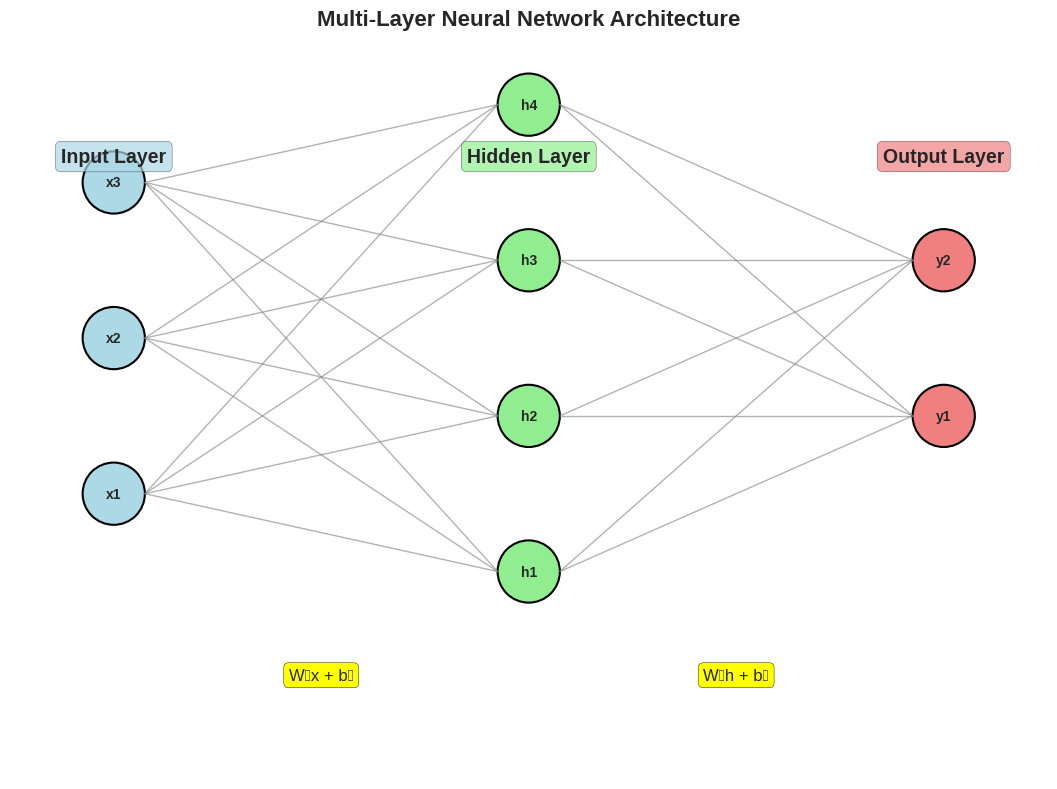

In [8]:
def visualize_neural_network():
    """Visualize a multi-layer neural network"""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Network structure: 3 input, 4 hidden, 2 output
    layers = [3, 4, 2]
    layer_names = ['Input Layer', 'Hidden Layer', 'Output Layer']
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    
    # Calculate positions
    max_neurons = max(layers)
    layer_spacing = 4
    neuron_spacing = 1.5
    
    positions = []
    for layer_idx, num_neurons in enumerate(layers):
        layer_positions = []
        start_y = (max_neurons - num_neurons) * neuron_spacing / 2
        
        for neuron_idx in range(num_neurons):
            x = layer_idx * layer_spacing
            y = start_y + neuron_idx * neuron_spacing
            layer_positions.append((x, y))
            
            # Draw neuron
            circle = plt.Circle((x, y), 0.3, color=colors[layer_idx], 
                              ec='black', linewidth=1.5)
            ax.add_patch(circle)
            
            # Add neuron labels
            if layer_idx == 0:
                ax.text(x, y, f'x{neuron_idx+1}', ha='center', va='center', fontweight='bold')
            elif layer_idx == len(layers) - 1:
                ax.text(x, y, f'y{neuron_idx+1}', ha='center', va='center', fontweight='bold')
            else:
                ax.text(x, y, f'h{neuron_idx+1}', ha='center', va='center', fontweight='bold')
        
        positions.append(layer_positions)
    
    # Draw connections
    for layer_idx in range(len(layers) - 1):
        for start_pos in positions[layer_idx]:
            for end_pos in positions[layer_idx + 1]:
                ax.plot([start_pos[0] + 0.3, end_pos[0] - 0.3], 
                       [start_pos[1], end_pos[1]], 
                       'gray', alpha=0.6, linewidth=1)
    
    # Add layer labels
    for i, (layer_name, color) in enumerate(zip(layer_names, colors)):
        ax.text(i * layer_spacing, max_neurons * neuron_spacing / 2 + 1, 
               layer_name, ha='center', va='center', fontsize=14, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7))
    
    # Add mathematical operations
    ax.text(layer_spacing/2, -1, 'W₁x + b₁', ha='center', va='center', 
           fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
    ax.text(layer_spacing + layer_spacing/2, -1, 'W₂h + b₂', ha='center', va='center', 
           fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"))
    
    ax.set_xlim(-1, (len(layers)-1) * layer_spacing + 1)
    ax.set_ylim(-2, max_neurons * neuron_spacing / 2 + 2)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Multi-Layer Neural Network Architecture', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

visualize_neural_network()

## 4. Loss Functions: The Mathematical Bridge Between Prediction and Truth

### The Fundamental Question: How Wrong Are We?

Loss functions are the mathematical bridge between what our model predicts and what actually happened. They transform the philosophical question "how wrong are we?" into a precise numerical value that our optimization algorithms can work with.

**Why Loss Functions Matter**:
- **Learning Direction**: Gradients of loss tell us how to update weights
- **Problem Definition**: Different tasks require different notions of "error"
- **Training Dynamics**: Loss landscape affects convergence and stability
- **Model Behavior**: Loss choice influences what the model optimizes for

### The Anatomy of a Loss Function

**Mathematical Requirements**:
1. **Non-negative**: L(y_true, y_pred) ≥ 0
2. **Zero when perfect**: L(y, y) = 0
3. **Differentiable**: We need gradients for backpropagation
4. **Increasing with error**: Worse predictions → higher loss

**Geometric Interpretation**:
- Loss function creates a **landscape** in parameter space
- **Valleys** correspond to good parameter settings
- **Hills** correspond to poor parameter settings
- **Optimization** = finding the deepest valley

### Regression Loss Functions: Measuring Continuous Errors

#### Mean Squared Error (MSE): The Geometric Distance

**Mathematical Definition**:
```
MSE = (1/n) Σᵢ (yᵢ - ŷᵢ)²
```

**Geometric Intuition**:
- Measures **Euclidean distance** between true and predicted values
- **Quadratic penalty**: Large errors hurt much more than small ones
- **Symmetric**: Over-prediction and under-prediction penalized equally

**When to Use MSE**:
- **Regression problems** with continuous targets
- When you want to **heavily penalize outliers**
- When errors are **normally distributed**
- **Not robust** to outliers (can dominate the loss)

**Mathematical Properties**:
- **Convex**: Guarantees global minimum
- **Smooth**: Easy to optimize
- **Derivative**: ∂MSE/∂ŷ = 2(ŷ - y)

#### Mean Absolute Error (MAE): The Robust Alternative

**Mathematical Definition**:
```
MAE = (1/n) Σᵢ |yᵢ - ŷᵢ|
```

**Geometric Intuition**:
- Measures **Manhattan distance** (city block distance)
- **Linear penalty**: All errors weighted equally
- **Robust to outliers**: Large errors don't dominate

**When to Use MAE**:
- When you have **outliers** in your data
- When all errors should be **weighted equally**
- When you want **median-like** behavior instead of mean-like

**Trade-offs vs MSE**:
- **Pro**: Robust to outliers
- **Con**: Not differentiable at zero (can slow convergence)
- **Con**: Less smooth optimization landscape

#### Huber Loss: The Best of Both Worlds

**Mathematical Definition**:
```
Huber(δ) = {
  (1/2)(y - ŷ)²           if |y - ŷ| ≤ δ
  δ|y - ŷ| - (1/2)δ²      otherwise
}
```

**Design Philosophy**:
- **Quadratic** for small errors (smooth optimization)
- **Linear** for large errors (robust to outliers)
- **Tunable** via δ parameter

### Classification Loss Functions: Measuring Probability Errors

#### Binary Cross-Entropy: The Information-Theoretic Approach

**Mathematical Definition**:
```
BCE = -[y log(p) + (1-y) log(1-p)]
```
where p = predicted probability, y ∈ {0, 1}

**Information-Theoretic Intuition**:
- Measures **information content** of predictions
- **Confident wrong** predictions heavily penalized
- **Confident correct** predictions lightly rewarded
- Derived from **maximum likelihood estimation**

**Why Logarithms?**:
- **log(p)** approaches -∞ as p approaches 0
- **Infinite penalty** for being confidently wrong
- **Information theory**: Surprise = -log(probability)

**Behavioral Analysis**:
- When y=1 (true class):
  - If p=0.9: Loss = -log(0.9) ≈ 0.1 (small penalty)
  - If p=0.1: Loss = -log(0.1) ≈ 2.3 (large penalty)
- **Asymmetric**: Being wrong hurts more than being right helps

#### Categorical Cross-Entropy: Extending to Multiple Classes

**Mathematical Definition**:
```
CCE = -Σₖ yₖ log(pₖ)
```
where yₖ is 1 if true class is k, 0 otherwise

**Softmax Connection**:
- Usually paired with **softmax activation**
- Softmax: pₖ = exp(zₖ) / Σⱼ exp(zⱼ)
- **Ensures** Σₖ pₖ = 1 (valid probability distribution)

**Multi-class Intuition**:
- Only the **true class** contributes to loss
- **Encourages** high probability for correct class
- **Indifferent** to distribution among wrong classes

#### Focal Loss: Handling Class Imbalance

**Mathematical Definition**:
```
Focal = -α(1-p)ᵞ log(p)
```

**Design Motivation**:
- **Problem**: Easy examples dominate training in imbalanced datasets
- **Solution**: Down-weight easy examples, focus on hard ones
- **α**: Balances positive/negative classes
- **γ**: Controls down-weighting of easy examples

### Advanced Loss Considerations

#### Regularization: Preventing Overfitting Through Loss

**L1 Regularization (Lasso)**:
```
L_total = L_data + λ Σᵢ |wᵢ|
```
- **Effect**: Promotes **sparse** weights (many zeros)
- **Use case**: Feature selection, interpretability

**L2 Regularization (Ridge)**:
```
L_total = L_data + λ Σᵢ wᵢ²
```
- **Effect**: Promotes **small** weights
- **Use case**: Smooth solutions, numerical stability

#### Loss Landscape and Training Dynamics

**Local Minima**:
- **Problem**: Gradient descent can get stuck
- **Reality**: Most local minima in neural networks are nearly as good as global
- **Solution**: Stochastic gradient descent adds noise to escape

**Saddle Points**:
- **More common** than local minima in high dimensions
- **Plateaus** where gradients are near zero
- **Solution**: Momentum and adaptive learning rates help

**Loss Valleys**:
- **Flat valleys**: Good generalization (stable to perturbations)
- **Sharp valleys**: Poor generalization (sensitive to changes)
- **Implicit bias**: SGD tends to find flatter solutions

### Practical Loss Function Selection Guide

#### For Regression:
1. **Start with MSE** for most problems
2. **Use MAE** if you have outliers
3. **Try Huber** for best of both worlds
4. **Consider quantile loss** for uncertainty estimation

#### For Binary Classification:
1. **Binary cross-entropy** is almost always the right choice
2. **Focal loss** for severe class imbalance
3. **Hinge loss** if you want SVM-like margins

#### For Multi-class Classification:
1. **Categorical cross-entropy** for mutually exclusive classes
2. **Binary cross-entropy** for multi-label (non-exclusive)
3. **Focal loss** for imbalanced datasets

#### Advanced Considerations:
1. **Label smoothing**: Prevents overconfident predictions
2. **Custom losses**: Design for your specific problem
3. **Multiple losses**: Combine different objectives
4. **Adversarial losses**: For generative models

### Common Pitfalls and Solutions

**Pitfall 1**: Using wrong loss for the problem
- **Example**: MSE for classification
- **Problem**: Doesn't align with evaluation metric
- **Solution**: Match loss to problem type

**Pitfall 2**: Ignoring class imbalance
- **Problem**: Model biased toward majority class
- **Solutions**: Weighted losses, focal loss, resampling

**Pitfall 3**: Loss scale mismatch
- **Problem**: Different loss components have vastly different scales
- **Solution**: Careful weight balancing, normalization

**Pitfall 4**: Not monitoring validation loss
- **Problem**: Overfitting goes undetected
- **Solution**: Always track both training and validation losses

Let's visualize these concepts to make the mathematics concrete:

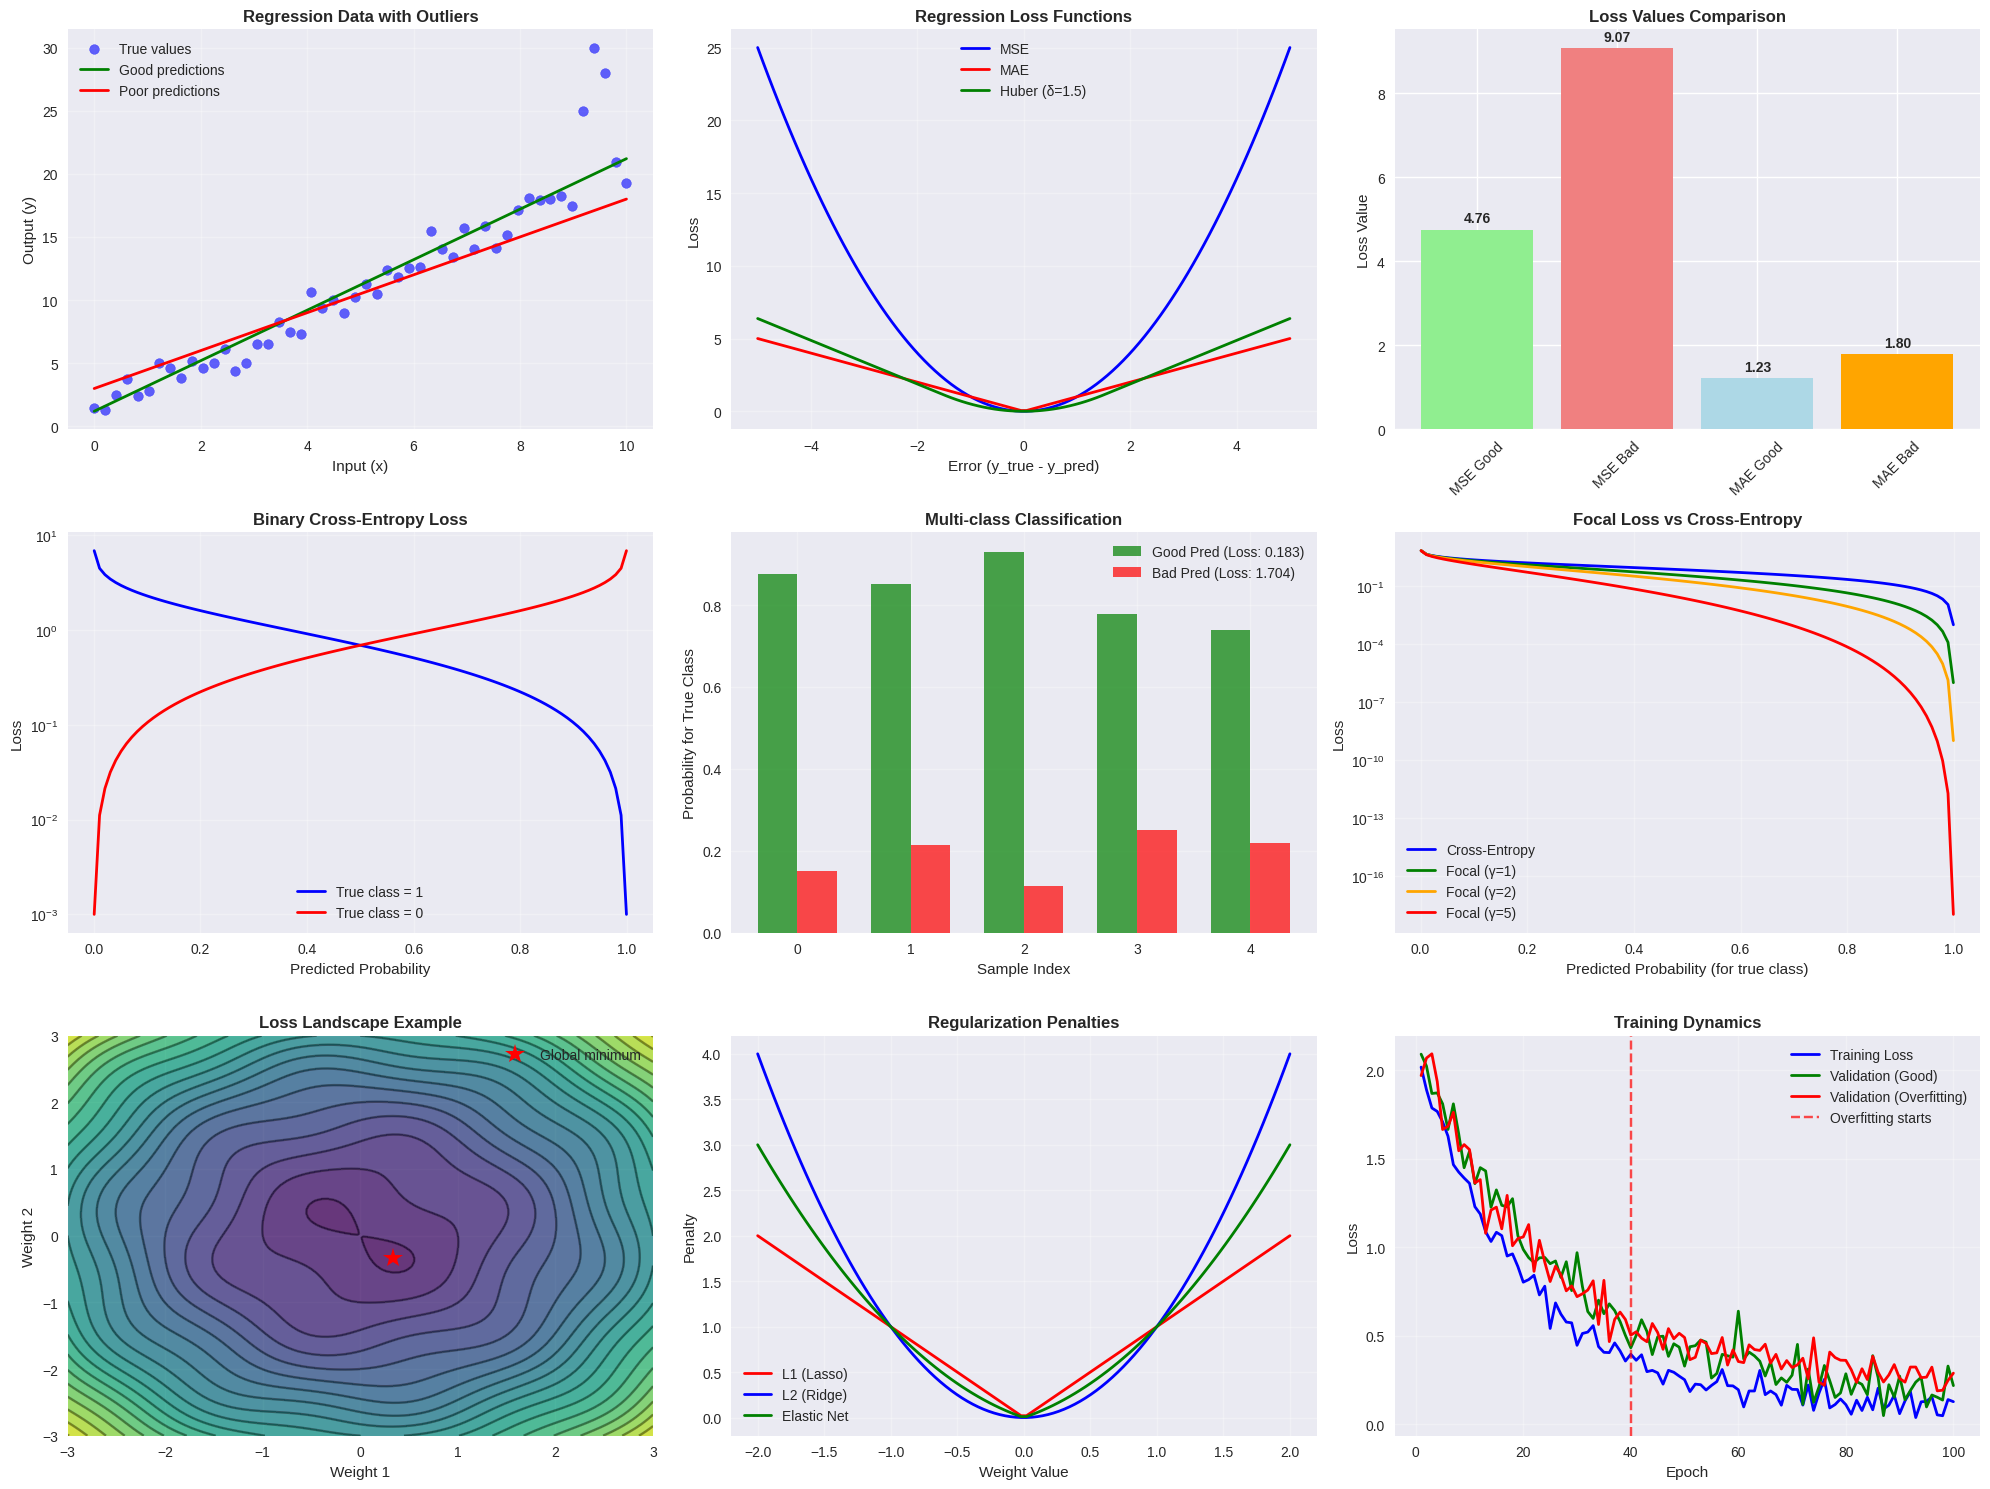

COMPREHENSIVE LOSS FUNCTION ANALYSIS

1. REGRESSION LOSS COMPARISON:
----------------------------------------
MSE Good Predictions: 4.755
MSE Bad Predictions:  9.071
MSE Ratio (Bad/Good): 1.9x

MAE Good Predictions: 1.229
MAE Bad Predictions:  1.799
MAE Ratio (Bad/Good): 1.5x

KEY INSIGHT: MSE amplifies the difference between good and bad predictions
due to squaring large errors, making it more sensitive to outliers.

2. CLASSIFICATION LOSS ANALYSIS:
----------------------------------------
Cross-Entropy Good Predictions: 0.183
Cross-Entropy Bad Predictions:  1.704
Ratio (Bad/Good): 9.3x

Average Probability for True Class:
Good Predictions: 0.836
Bad Predictions:  0.189

3. LOSS FUNCTION PROPERTIES:
----------------------------------------
MSE (Mean Squared Error):
  • Heavily penalizes large errors (quadratic growth)
  • Smooth gradients everywhere
  • Sensitive to outliers
  • Assumes Gaussian noise

MAE (Mean Absolute Error):
  • Linear penalty for all errors
  • Robust to outliers

In [9]:
def comprehensive_loss_demonstration():
    """Comprehensive demonstration of different loss functions with mathematical insights"""
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Regression Loss Functions Comparison
    ax1 = plt.subplot(3, 3, 1)
    
    # Generate data with outliers
    np.random.seed(42)
    x = np.linspace(0, 10, 50)
    y_true = 2 * x + 1 + np.random.normal(0, 1, 50)
    # Add some outliers
    y_true[45:48] = [25, 30, 28]
    
    # Different predictions
    y_pred_good = 2 * x + 1.2
    y_pred_bad = 1.5 * x + 3
    
    ax1.scatter(x, y_true, alpha=0.6, label='True values', color='blue')
    ax1.plot(x, y_pred_good, 'g-', linewidth=2, label='Good predictions')
    ax1.plot(x, y_pred_bad, 'r-', linewidth=2, label='Poor predictions')
    ax1.set_title('Regression Data with Outliers', fontweight='bold')
    ax1.set_xlabel('Input (x)')
    ax1.set_ylabel('Output (y)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Loss Function Behaviors
    ax2 = plt.subplot(3, 3, 2)
    
    errors = np.linspace(-5, 5, 100)
    mse_loss = errors ** 2
    mae_loss = np.abs(errors)
    huber_loss = np.where(np.abs(errors) <= 1.5, 
                         0.5 * errors ** 2,
                         1.5 * np.abs(errors) - 0.5 * 1.5 ** 2)
    
    ax2.plot(errors, mse_loss, 'b-', linewidth=2, label='MSE')
    ax2.plot(errors, mae_loss, 'r-', linewidth=2, label='MAE')
    ax2.plot(errors, huber_loss, 'g-', linewidth=2, label='Huber (δ=1.5)')
    ax2.set_title('Regression Loss Functions', fontweight='bold')
    ax2.set_xlabel('Error (y_true - y_pred)')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Loss Values Comparison
    ax3 = plt.subplot(3, 3, 3)
    
    y_true_tensor = torch.tensor(y_true, dtype=torch.float32)
    y_pred_good_tensor = torch.tensor(y_pred_good, dtype=torch.float32)
    y_pred_bad_tensor = torch.tensor(y_pred_bad, dtype=torch.float32)
    
    losses = {
        'MSE Good': F.mse_loss(y_pred_good_tensor, y_true_tensor).item(),
        'MSE Bad': F.mse_loss(y_pred_bad_tensor, y_true_tensor).item(),
        'MAE Good': F.l1_loss(y_pred_good_tensor, y_true_tensor).item(),
        'MAE Bad': F.l1_loss(y_pred_bad_tensor, y_true_tensor).item()
    }
    
    bars = ax3.bar(losses.keys(), losses.values(), 
                   color=['lightgreen', 'lightcoral', 'lightblue', 'orange'])
    ax3.set_title('Loss Values Comparison', fontweight='bold')
    ax3.set_ylabel('Loss Value')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, losses.values()):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Binary Classification Loss
    ax4 = plt.subplot(3, 3, 4)
    
    # Create probability predictions
    probs = np.linspace(0.001, 0.999, 100)  # Avoid log(0)
    
    # Binary cross-entropy for positive class (y=1)
    bce_positive = -np.log(probs)
    # Binary cross-entropy for negative class (y=0)
    bce_negative = -np.log(1 - probs)
    
    ax4.plot(probs, bce_positive, 'b-', linewidth=2, label='True class = 1')
    ax4.plot(probs, bce_negative, 'r-', linewidth=2, label='True class = 0')
    ax4.set_title('Binary Cross-Entropy Loss', fontweight='bold')
    ax4.set_xlabel('Predicted Probability')
    ax4.set_ylabel('Loss')
    ax4.set_yscale('log')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Multi-class Classification Example
    ax5 = plt.subplot(3, 3, 5)
    
    # Simulate 5 samples, 3 classes
    y_true_class = torch.tensor([0, 1, 2, 1, 0])
    
    # Good predictions (high probability for correct class)
    good_logits = torch.tensor([
        [3.0, 0.5, 0.2],   # Strong prediction for class 0
        [0.3, 2.8, 0.4],   # Strong prediction for class 1
        [0.1, 0.3, 3.5],   # Strong prediction for class 2
        [0.2, 2.5, 0.8],   # Good prediction for class 1
        [2.2, 0.6, 0.3]    # Good prediction for class 0
    ])
    
    # Bad predictions (low probability for correct class)
    bad_logits = torch.tensor([
        [0.5, 1.2, 1.8],   # Wrong prediction for class 0
        [1.5, 0.8, 1.3],   # Uncertain prediction for class 1
        [1.8, 1.5, 0.3],   # Wrong prediction for class 2
        [1.2, 0.9, 1.4],   # Wrong prediction for class 1
        [0.8, 1.6, 1.1]    # Wrong prediction for class 0
    ])
    
    # Convert to probabilities
    good_probs = F.softmax(good_logits, dim=1)
    bad_probs = F.softmax(bad_logits, dim=1)
    
    # Calculate losses
    ce_good = F.cross_entropy(good_logits, y_true_class)
    ce_bad = F.cross_entropy(bad_logits, y_true_class)
    
    # Extract probabilities for true classes
    good_true_probs = good_probs[range(len(y_true_class)), y_true_class]
    bad_true_probs = bad_probs[range(len(y_true_class)), y_true_class]
    
    x_pos = np.arange(len(y_true_class))
    width = 0.35
    
    bars1 = ax5.bar(x_pos - width/2, good_true_probs, width, 
                    label=f'Good Pred (Loss: {ce_good:.3f})', color='green', alpha=0.7)
    bars2 = ax5.bar(x_pos + width/2, bad_true_probs, width, 
                    label=f'Bad Pred (Loss: {ce_bad:.3f})', color='red', alpha=0.7)
    
    ax5.set_title('Multi-class Classification', fontweight='bold')
    ax5.set_xlabel('Sample Index')
    ax5.set_ylabel('Probability for True Class')
    ax5.set_xticks(x_pos)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Focal Loss vs Cross-Entropy
    ax6 = plt.subplot(3, 3, 6)
    
    # Compare focal loss with cross-entropy for class imbalance
    probs = np.linspace(0.001, 0.999, 100)
    ce_loss = -np.log(probs)
    
    # Focal loss with different gamma values
    gamma_values = [0, 1, 2, 5]
    colors = ['blue', 'green', 'orange', 'red']
    
    for gamma, color in zip(gamma_values, colors):
        focal_loss = -(1 - probs) ** gamma * np.log(probs)
        label = 'Cross-Entropy' if gamma == 0 else f'Focal (γ={gamma})'
        ax6.plot(probs, focal_loss, color=color, linewidth=2, label=label)
    
    ax6.set_title('Focal Loss vs Cross-Entropy', fontweight='bold')
    ax6.set_xlabel('Predicted Probability (for true class)')
    ax6.set_ylabel('Loss')
    ax6.set_yscale('log')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # 7. Loss Landscape Visualization
    ax7 = plt.subplot(3, 3, 7)
    
    # Simple 2D loss landscape
    w1 = np.linspace(-3, 3, 100)
    w2 = np.linspace(-3, 3, 100)
    W1, W2 = np.meshgrid(w1, w2)
    
    # Create a loss landscape with multiple minima
    Loss = (W1 ** 2 + W2 ** 2) + 0.5 * np.sin(3 * W1) * np.sin(3 * W2)
    
    contour = ax7.contour(W1, W2, Loss, levels=20, colors='black', alpha=0.4)
    contourf = ax7.contourf(W1, W2, Loss, levels=20, cmap='viridis', alpha=0.8)
    
    # Mark global minimum
    min_idx = np.unravel_index(np.argmin(Loss), Loss.shape)
    ax7.plot(W1[min_idx], W2[min_idx], 'r*', markersize=15, label='Global minimum')
    
    ax7.set_title('Loss Landscape Example', fontweight='bold')
    ax7.set_xlabel('Weight 1')
    ax7.set_ylabel('Weight 2')
    ax7.legend()
    
    # 8. Regularization Effects
    ax8 = plt.subplot(3, 3, 8)
    
    weights = np.linspace(-2, 2, 100)
    
    # Different regularization penalties
    l1_penalty = np.abs(weights)
    l2_penalty = weights ** 2
    elastic_net = 0.5 * l1_penalty + 0.5 * l2_penalty
    
    ax8.plot(weights, l1_penalty, 'r-', linewidth=2, label='L1 (Lasso)')
    ax8.plot(weights, l2_penalty, 'b-', linewidth=2, label='L2 (Ridge)')
    ax8.plot(weights, elastic_net, 'g-', linewidth=2, label='Elastic Net')
    
    ax8.set_title('Regularization Penalties', fontweight='bold')
    ax8.set_xlabel('Weight Value')
    ax8.set_ylabel('Penalty')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # 9. Training vs Validation Loss
    ax9 = plt.subplot(3, 3, 9)
    
    epochs = np.arange(1, 101)
    
    # Simulate training curves
    train_loss = 2 * np.exp(-epochs/20) + 0.1 + 0.05 * np.random.randn(100)
    val_loss_good = 2 * np.exp(-epochs/25) + 0.15 + 0.08 * np.random.randn(100)
    val_loss_overfit = 2 * np.exp(-epochs/25) + 0.15 + 0.08 * np.random.randn(100)
    
    # Add overfitting after epoch 40
    val_loss_overfit[40:] = val_loss_overfit[40:] + 0.002 * (epochs[40:] - 40)
    
    ax9.plot(epochs, train_loss, 'b-', linewidth=2, label='Training Loss')
    ax9.plot(epochs, val_loss_good, 'g-', linewidth=2, label='Validation (Good)')
    ax9.plot(epochs, val_loss_overfit, 'r-', linewidth=2, label='Validation (Overfitting)')
    
    ax9.axvline(x=40, color='red', linestyle='--', alpha=0.7, label='Overfitting starts')
    
    ax9.set_title('Training Dynamics', fontweight='bold')
    ax9.set_xlabel('Epoch')
    ax9.set_ylabel('Loss')
    ax9.legend()
    ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print("="*80)
    print("COMPREHENSIVE LOSS FUNCTION ANALYSIS")
    print("="*80)
    
    print("\n1. REGRESSION LOSS COMPARISON:")
    print("-" * 40)
    print(f"MSE Good Predictions: {losses['MSE Good']:.3f}")
    print(f"MSE Bad Predictions:  {losses['MSE Bad']:.3f}")
    print(f"MSE Ratio (Bad/Good): {losses['MSE Bad']/losses['MSE Good']:.1f}x")
    print()
    print(f"MAE Good Predictions: {losses['MAE Good']:.3f}")
    print(f"MAE Bad Predictions:  {losses['MAE Bad']:.3f}")
    print(f"MAE Ratio (Bad/Good): {losses['MAE Bad']/losses['MAE Good']:.1f}x")
    print()
    print("KEY INSIGHT: MSE amplifies the difference between good and bad predictions")
    print("due to squaring large errors, making it more sensitive to outliers.")
    
    print("\n2. CLASSIFICATION LOSS ANALYSIS:")
    print("-" * 40)
    print(f"Cross-Entropy Good Predictions: {ce_good.item():.3f}")
    print(f"Cross-Entropy Bad Predictions:  {ce_bad.item():.3f}")
    print(f"Ratio (Bad/Good): {ce_bad.item()/ce_good.item():.1f}x")
    print()
    print("Average Probability for True Class:")
    print(f"Good Predictions: {good_true_probs.mean():.3f}")
    print(f"Bad Predictions:  {bad_true_probs.mean():.3f}")
    
    print("\n3. LOSS FUNCTION PROPERTIES:")
    print("-" * 40)
    print("MSE (Mean Squared Error):")
    print("  • Heavily penalizes large errors (quadratic growth)")
    print("  • Smooth gradients everywhere")
    print("  • Sensitive to outliers")
    print("  • Assumes Gaussian noise")
    print()
    print("MAE (Mean Absolute Error):")
    print("  • Linear penalty for all errors")
    print("  • Robust to outliers")
    print("  • Not differentiable at zero")
    print("  • Assumes Laplacian noise")
    print()
    print("Cross-Entropy:")
    print("  • Infinite penalty for confident wrong predictions")
    print("  • Encourages calibrated probabilities")
    print("  • Information-theoretically motivated")
    print("  • Works with softmax for multi-class")
    print()
    print("Focal Loss:")
    print("  • Down-weights easy examples")
    print("  • Focuses on hard examples")
    print("  • Helps with class imbalance")
    print("  • Tunable via α and γ parameters")
    
    print("\n4. PRACTICAL SELECTION GUIDE:")
    print("-" * 40)
    print("Use MSE when:")
    print("  • Regression with normally distributed errors")
    print("  • You want to heavily penalize large errors")
    print("  • No significant outliers in data")
    print()
    print("Use MAE when:")
    print("  • Regression with outliers present")
    print("  • All errors should be weighted equally")
    print("  • You want robust optimization")
    print()
    print("Use Cross-Entropy when:")
    print("  • Classification tasks")
    print("  • You need probability estimates")
    print("  • Balanced or mildly imbalanced classes")
    print()
    print("Use Focal Loss when:")
    print("  • Severe class imbalance")
    print("  • Many easy examples dominate training")
    print("  • Hard examples are critical")
    
    return losses, ce_good.item(), ce_bad.item()

# Run the comprehensive demonstration
losses, ce_good, ce_bad = comprehensive_loss_demonstration()

## 5. Gradient Descent and Backpropagation: The Learning Engine

### The Fundamental Learning Problem

Once we have a loss function that measures how wrong our predictions are, we face the central question of machine learning: **How do we adjust our model's parameters to reduce this loss?**

This is fundamentally an **optimization problem**:
```
Find: θ* = argmin L(θ)
where θ are model parameters and L is our loss function
```

### Gradient Descent: Following the Steepest Descent

#### The Geometric Intuition

Imagine you're hiking in mountainous terrain during a thick fog. You can't see where you're going, but you can feel the slope beneath your feet. To reach the valley (minimum), you would:

1. **Feel the slope** at your current position
2. **Step in the steepest downhill direction**
3. **Repeat** until you reach flat ground

This is exactly what gradient descent does in parameter space!

#### The Mathematical Foundation

**Gradient**: The vector of partial derivatives
```
∇L(θ) = [∂L/∂θ₁, ∂L/∂θ₂, ..., ∂L/∂θₙ]
```

**Key Properties**:
- **Direction**: Points toward steepest **increase** in loss
- **Magnitude**: Indicates how steep the slope is
- **Zero gradient**: Indicates local minimum (or maximum, or saddle point)

**Gradient Descent Update Rule**:
```
θₙₑʷ = θᵒ⸜ᵈ - η ∇L(θᵒ⸜ᵈ)
```

where:
- **η** (eta) is the **learning rate**
- **Negative sign**: We move **opposite** to gradient (downhill)

#### Why Gradients Work: The Taylor Series Insight

For small steps, we can approximate the loss function using Taylor expansion:
```
L(θ + Δθ) ≈ L(θ) + ∇L(θ)ᵀ Δθ
```

To minimize L(θ + Δθ), we want ∇L(θ)ᵀ Δθ < 0

This is achieved when Δθ = -η ∇L(θ) for η > 0

### Variants of Gradient Descent

#### Batch Gradient Descent
```
θ = θ - η ∇L(θ)  # Using entire dataset
```

**Characteristics**:
- **Pros**: Exact gradient, smooth convergence
- **Cons**: Expensive for large datasets, can get stuck in local minima
- **Use case**: Small datasets, when exact gradients are needed

#### Stochastic Gradient Descent (SGD)
```
θ = θ - η ∇Lᵢ(θ)  # Using single example
```

**Characteristics**:
- **Pros**: Fast updates, noise helps escape local minima
- **Cons**: Noisy gradients, may not converge exactly
- **Use case**: Large datasets, online learning

#### Mini-batch Gradient Descent
```
θ = θ - η ∇L_batch(θ)  # Using small batch
```

**Characteristics**:
- **Best of both worlds**: Reasonable gradient estimates, efficient computation
- **Standard choice**: Batch sizes typically 32, 64, 128, 256
- **GPU friendly**: Parallel computation across batch

### The Learning Rate: The Most Critical Hyperparameter

#### Learning Rate Effects

**Too Small (η ≪ 1)**:
- **Problem**: Extremely slow convergence
- **Symptom**: Loss decreases very slowly
- **Solution**: Increase learning rate

**Too Large (η ≫ 1)**:
- **Problem**: Overshooting, divergence
- **Symptom**: Loss oscillates or increases
- **Solution**: Decrease learning rate

**Just Right**:
- **Behavior**: Steady, efficient decrease in loss
- **Challenge**: Optimal rate depends on problem and current location

#### Adaptive Learning Rates

**Learning Rate Schedules**:
- **Step decay**: Reduce by factor every few epochs
- **Exponential decay**: ηₜ = η₀ e^(-λₜ)
- **Cosine annealing**: Smooth oscillation

**Adaptive Methods**:
- **AdaGrad**: Adapts to parameter frequency
- **Adam**: Combines momentum and adaptive rates
- **RMSprop**: Addresses AdaGrad's learning rate decay

### Backpropagation: Computing Gradients Efficiently

#### The Challenge: Gradient Computation in Deep Networks

For a neural network with parameters W₁, W₂, ..., Wₙ, we need:
```
∂L/∂W₁, ∂L/∂W₂, ..., ∂L/∂Wₙ
```

**Naive approach**: Compute each partial derivative separately
- **Problem**: O(n) forward passes for n parameters
- **Reality**: Modern networks have millions of parameters

**Backpropagation**: Compute all gradients in one backward pass
- **Efficiency**: O(1) - one forward pass + one backward pass
- **Key insight**: Use chain rule systematically

#### The Chain Rule: The Mathematical Engine

**Single Variable Chain Rule**:
```
If z = f(g(x)), then dz/dx = (df/dg) × (dg/dx)
```

**Multivariable Chain Rule**:
```
If z = f(x, y) and x = g(t), y = h(t), then:
dz/dt = (∂f/∂x)(∂g/∂t) + (∂f/∂y)(∂h/∂t)
```

**Neural Network Application**:
For network: x → h₁ → h₂ → ... → y → L

```
∂L/∂W₁ = (∂L/∂hₙ) × (∂hₙ/∂hₙ₋₁) × ... × (∂h₂/∂h₁) × (∂h₁/∂W₁)
```

#### Backpropagation Algorithm: Step by Step

**Forward Pass**:
1. **Input**: Feed data through network
2. **Activations**: Store intermediate values h₁, h₂, ..., hₙ
3. **Loss**: Compute L(y, y_true)

**Backward Pass**:
1. **Output gradient**: ∂L/∂y
2. **Propagate backward**:
   ```
   ∂L/∂hₙ = (∂L/∂y) × (∂y/∂hₙ)
   ∂L/∂hₙ₋₁ = (∂L/∂hₙ) × (∂hₙ/∂hₙ₋₁)
   ...
   ```
3. **Parameter gradients**:
   ```
   ∂L/∂Wₙ = (∂L/∂hₙ) × (∂hₙ/∂Wₙ)
   ```

#### Computational Graph Perspective

**Nodes**: Operations (matrix multiply, activation function, loss)
**Edges**: Data flow (tensors)

**Forward Pass**: Traverse graph left-to-right
**Backward Pass**: Traverse graph right-to-left, accumulating gradients

**Automatic Differentiation**: Modern frameworks (PyTorch, TensorFlow) build computational graphs automatically and compute gradients via backpropagation

### Practical Considerations and Common Issues

#### Vanishing Gradients

**Problem**: Gradients become exponentially small in early layers
**Mathematics**: 
```
∂L/∂W₁ ∝ ∏ᵢ (∂hᵢ/∂hᵢ₋₁)
```
If each factor < 1, product approaches 0

**Causes**:
- **Activation functions**: Sigmoid/tanh have small derivatives
- **Deep networks**: Many small factors multiply
- **Poor initialization**: Weights too small

**Solutions**:
- **ReLU activations**: Linear for positive inputs
- **Better initialization**: Xavier, He initialization
- **Normalization**: Batch normalization, layer normalization
- **Skip connections**: ResNet-style shortcuts

#### Exploding Gradients

**Problem**: Gradients become exponentially large
**Symptom**: Loss increases dramatically, NaN values

**Solutions**:
- **Gradient clipping**: Limit gradient magnitude
- **Better initialization**: Prevent extreme initial weights
- **Learning rate reduction**: Smaller steps

#### Numerical Stability

**Issues**:
- **Overflow/underflow**: Very large/small numbers
- **Catastrophic cancellation**: Subtracting similar numbers

**Solutions**:
- **Stable implementations**: LogSumExp for softmax
- **Mixed precision**: Use different precisions strategically
- **Numerical tricks**: Log-space computations

### Modern Optimization Advances

#### Momentum
```
vₜ = βvₜ₋₁ + (1-β)∇L(θₜ)
θₜ₊₁ = θₜ - ηvₜ
```

**Intuition**: Ball rolling downhill accumulates momentum
**Benefits**: Accelerates in consistent directions, dampens oscillations

#### Adam Optimizer
```
mₜ = β₁mₜ₋₁ + (1-β₁)∇L(θₜ)      # Momentum
vₜ = β₂vₜ₋₁ + (1-β₂)(∇L(θₜ))²    # Adaptive learning rate
θₜ₊₁ = θₜ - ηmₜ/(√vₜ + ε)
```

**Combines**: Momentum + adaptive learning rates
**Why popular**: Works well across many problems with minimal tuning

### Debugging Gradient Descent

#### Gradient Checking
**Numerical gradient**: (f(x+h) - f(x-h)) / (2h)
**Analytical gradient**: From backpropagation
**Check**: |numerical - analytical| < 10⁷

#### Common Debugging Steps
1. **Sanity check**: Can model overfit small dataset?
2. **Learning curves**: Plot training/validation loss
3. **Gradient norms**: Monitor gradient magnitudes
4. **Weight updates**: Check if parameters are changing
5. **Activation analysis**: Examine layer outputs

Let's visualize these optimization concepts:

/tmp/ipykernel_275/2714613287.py:413: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_275/2714613287.py:413: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()


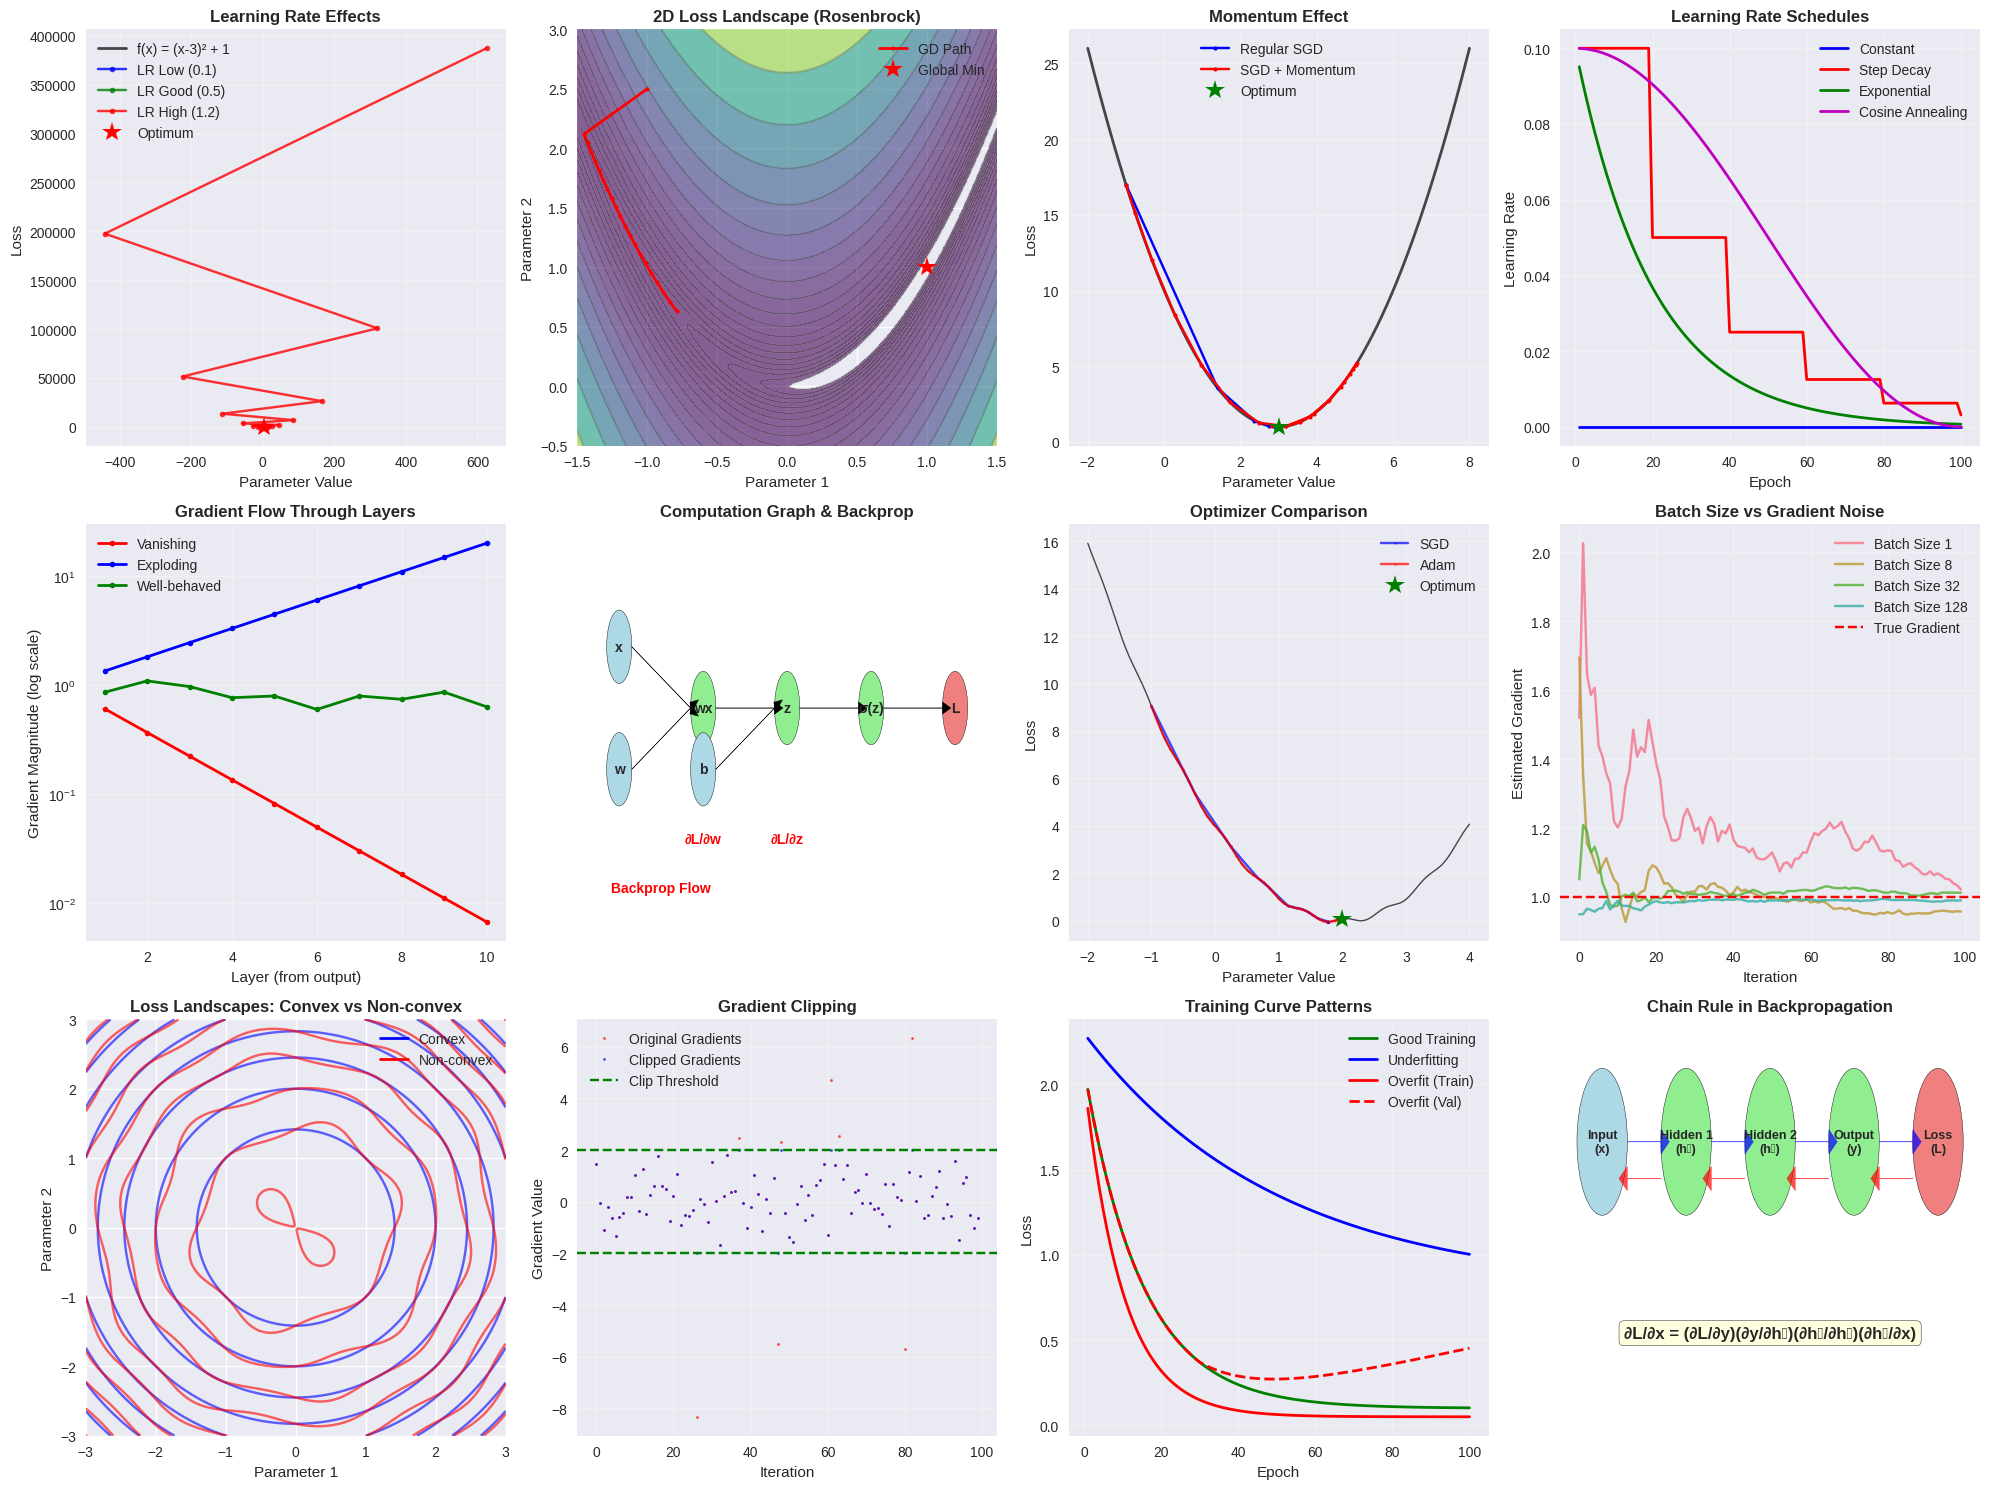

COMPREHENSIVE OPTIMIZATION & BACKPROPAGATION ANALYSIS

1. GRADIENT DESCENT FUNDAMENTALS:
--------------------------------------------------
Mathematical Foundation:
  • θ_new = θ_old - η∇L(θ)
  • η (learning rate) controls step size
  • ∇L(θ) points toward steepest increase
  • Negative gradient = steepest decrease direction

Learning Rate Effects:
  • Too small: Slow convergence, may get stuck
  • Too large: Overshooting, instability, divergence
  • Just right: Steady progress toward minimum

2. VARIANTS OF GRADIENT DESCENT:
--------------------------------------------------
Batch Gradient Descent:
  • Uses entire dataset per update
  • Pros: Exact gradients, smooth convergence
  • Cons: Expensive, can get stuck in local minima

Stochastic Gradient Descent (SGD):
  • Uses single example per update
  • Pros: Fast updates, noise helps escape local minima
  • Cons: Noisy gradients, may not converge exactly

Mini-batch Gradient Descent:
  • Best compromise: uses small batches (32-256)
  •

In [10]:
def comprehensive_optimization_demonstration():
    """Comprehensive demonstration of gradient descent, backpropagation, and optimization concepts"""
    
    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Basic Gradient Descent on 1D Function
    ax1 = plt.subplot(3, 4, 1)
    
    def simple_function(x):
        return (x - 3) ** 2 + 1
    
    def simple_gradient(x):
        return 2 * (x - 3)
    
    # Different learning rates
    learning_rates = [0.1, 0.5, 1.2]
    colors = ['blue', 'green', 'red']
    labels = ['Low (0.1)', 'Good (0.5)', 'High (1.2)']
    
    x_range = np.linspace(-2, 8, 1000)
    y_range = simple_function(x_range)
    ax1.plot(x_range, y_range, 'k-', linewidth=2, alpha=0.7, label='f(x) = (x-3)² + 1')
    
    for lr, color, label in zip(learning_rates, colors, labels):
        x_current = -1.0
        x_path = [x_current]
        
        for _ in range(15):
            gradient = simple_gradient(x_current)
            x_current = x_current - lr * gradient
            x_path.append(x_current)
            if abs(gradient) < 1e-6:  # Convergence check
                break
        
        y_path = [simple_function(x) for x in x_path]
        ax1.plot(x_path, y_path, 'o-', color=color, markersize=4, alpha=0.8, label=f'LR {label}')
    
    ax1.plot(3, 1, 'r*', markersize=15, label='Optimum')
    ax1.set_title('Learning Rate Effects', fontweight='bold')
    ax1.set_xlabel('Parameter Value')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. 2D Loss Landscape with Gradient Descent
    ax2 = plt.subplot(3, 4, 2)
    
    def rosenbrock(x, y):
        return 100 * (y - x**2)**2 + (1 - x)**2
    
    def rosenbrock_grad(x, y):
        dx = -400 * x * (y - x**2) - 2 * (1 - x)
        dy = 200 * (y - x**2)
        return dx, dy
    
    # Create loss landscape
    x_2d = np.linspace(-1.5, 1.5, 100)
    y_2d = np.linspace(-0.5, 3, 100)
    X, Y = np.meshgrid(x_2d, y_2d)
    Z = rosenbrock(X, Y)
    
    # Plot contours
    levels = np.logspace(0, 3, 20)
    contour = ax2.contour(X, Y, Z, levels=levels, colors='gray', alpha=0.4)
    contourf = ax2.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
    
    # Gradient descent path
    x_current, y_current = -1.0, 2.5
    x_path_2d = [x_current]
    y_path_2d = [y_current]
    
    learning_rate_2d = 0.001
    for i in range(1000):
        dx, dy = rosenbrock_grad(x_current, y_current)
        x_current = x_current - learning_rate_2d * dx
        y_current = y_current - learning_rate_2d * dy
        x_path_2d.append(x_current)
        y_path_2d.append(y_current)
        
        if i % 50 == 0:  # Record every 50th point
            continue
    
    ax2.plot(x_path_2d[::50], y_path_2d[::50], 'r.-', markersize=6, linewidth=2, label='GD Path')
    ax2.plot(1, 1, 'r*', markersize=15, label='Global Min')
    ax2.set_title('2D Loss Landscape (Rosenbrock)', fontweight='bold')
    ax2.set_xlabel('Parameter 1')
    ax2.set_ylabel('Parameter 2')
    ax2.legend()
    
    # 3. Momentum vs Regular SGD
    ax3 = plt.subplot(3, 4, 3)
    
    # Regular SGD
    x_sgd = -1.0
    path_sgd = [x_sgd]
    lr = 0.3
    
    for _ in range(20):
        grad = simple_gradient(x_sgd)
        x_sgd = x_sgd - lr * grad
        path_sgd.append(x_sgd)
    
    # SGD with Momentum
    x_momentum = -1.0
    velocity = 0.0
    path_momentum = [x_momentum]
    beta = 0.9
    
    for _ in range(20):
        grad = simple_gradient(x_momentum)
        velocity = beta * velocity + (1 - beta) * grad
        x_momentum = x_momentum - lr * velocity
        path_momentum.append(x_momentum)
    
    ax3.plot(x_range, y_range, 'k-', linewidth=2, alpha=0.7)
    ax3.plot(path_sgd, [simple_function(x) for x in path_sgd], 'b.-', label='Regular SGD', markersize=6)
    ax3.plot(path_momentum, [simple_function(x) for x in path_momentum], 'r.-', label='SGD + Momentum', markersize=6)
    ax3.plot(3, 1, 'g*', markersize=15, label='Optimum')
    ax3.set_title('Momentum Effect', fontweight='bold')
    ax3.set_xlabel('Parameter Value')
    ax3.set_ylabel('Loss')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Learning Rate Schedules
    ax4 = plt.subplot(3, 4, 4)
    
    epochs = np.arange(1, 101)
    
    # Different schedules
    constant = np.full_like(epochs, 0.1)
    step_decay = 0.1 * (0.5 ** (epochs // 20))
    exponential_decay = 0.1 * np.exp(-0.05 * epochs)
    cosine_annealing = 0.05 + 0.05 * np.cos(np.pi * epochs / 100)
    
    ax4.plot(epochs, constant, 'b-', linewidth=2, label='Constant')
    ax4.plot(epochs, step_decay, 'r-', linewidth=2, label='Step Decay')
    ax4.plot(epochs, exponential_decay, 'g-', linewidth=2, label='Exponential')
    ax4.plot(epochs, cosine_annealing, 'm-', linewidth=2, label='Cosine Annealing')
    
    ax4.set_title('Learning Rate Schedules', fontweight='bold')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Learning Rate')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Gradient Flow in Deep Networks
    ax5 = plt.subplot(3, 4, 5)
    
    # Simulate gradient magnitudes through layers
    layers = np.arange(1, 11)
    
    # Vanishing gradients (e.g., with sigmoid)
    vanishing = np.exp(-0.5 * layers)
    
    # Exploding gradients
    exploding = np.exp(0.3 * layers)
    
    # Well-behaved (e.g., with ReLU and good initialization)
    well_behaved = np.ones_like(layers) * 0.8 + 0.2 * np.random.randn(len(layers))
    
    ax5.semilogy(layers, vanishing, 'r.-', linewidth=2, markersize=8, label='Vanishing')
    ax5.semilogy(layers, exploding, 'b.-', linewidth=2, markersize=8, label='Exploding')
    ax5.semilogy(layers, np.abs(well_behaved), 'g.-', linewidth=2, markersize=8, label='Well-behaved')
    
    ax5.set_title('Gradient Flow Through Layers', fontweight='bold')
    ax5.set_xlabel('Layer (from output)')
    ax5.set_ylabel('Gradient Magnitude (log scale)')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Backpropagation Computational Graph
    ax6 = plt.subplot(3, 4, 6)
    
    # Simple computation graph visualization
    # Forward: x -> w*x -> +b -> sigmoid -> loss
    
    # Node positions
    nodes = {
        'x': (0, 0.5),
        'w': (0, 0),
        'wx': (1, 0.25),
        'b': (1, 0),
        'z': (2, 0.25),
        'σ(z)': (3, 0.25),
        'L': (4, 0.25)
    }
    
    # Draw nodes
    for name, (x, y) in nodes.items():
        if name in ['x', 'w', 'b']:
            color = 'lightblue'
        elif name == 'L':
            color = 'lightcoral'
        else:
            color = 'lightgreen'
        
        circle = plt.Circle((x, y), 0.15, color=color, ec='black')
        ax6.add_patch(circle)
        ax6.text(x, y, name, ha='center', va='center', fontweight='bold', fontsize=10)
    
    # Draw edges (forward)
    edges = [('x', 'wx'), ('w', 'wx'), ('wx', 'z'), ('b', 'z'), ('z', 'σ(z)'), ('σ(z)', 'L')]
    for start, end in edges:
        x1, y1 = nodes[start]
        x2, y2 = nodes[end]
        ax6.arrow(x1+0.15, y1, x2-x1-0.3, y2-y1, head_width=0.05, head_length=0.1, fc='black', ec='black')
    
    # Add gradient flow annotations
    ax6.text(2, -0.3, '∂L/∂z', ha='center', fontsize=10, color='red', weight='bold')
    ax6.text(1, -0.3, '∂L/∂w', ha='center', fontsize=10, color='red', weight='bold')
    ax6.text(0.5, -0.5, 'Backprop Flow', ha='center', fontsize=10, color='red', weight='bold')
    
    ax6.set_xlim(-0.5, 4.5)
    ax6.set_ylim(-0.7, 1)
    ax6.set_title('Computation Graph & Backprop', fontweight='bold')
    ax6.axis('off')
    
    # 7. Optimizer Comparison
    ax7 = plt.subplot(3, 4, 7)
    
    # Simulate different optimizers on a simple function
    def noisy_quadratic(x):
        return (x - 2)**2 + 0.1 * np.sin(10 * x)
    
    def noisy_grad(x):
        return 2 * (x - 2) + np.cos(10 * x)
    
    x_start = -1.0
    iterations = 50
    
    # SGD
    x_sgd = x_start
    path_sgd_opt = [x_sgd]
    for _ in range(iterations):
        x_sgd = x_sgd - 0.1 * noisy_grad(x_sgd)
        path_sgd_opt.append(x_sgd)
    
    # Adam (simplified)
    x_adam = x_start
    m, v = 0, 0
    path_adam = [x_adam]
    beta1, beta2 = 0.9, 0.999
    alpha = 0.1
    
    for t in range(1, iterations + 1):
        g = noisy_grad(x_adam)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x_adam = x_adam - alpha * m_hat / (np.sqrt(v_hat) + 1e-8)
        path_adam.append(x_adam)
    
    x_plot = np.linspace(-2, 4, 1000)
    y_plot = [noisy_quadratic(x) for x in x_plot]
    
    ax7.plot(x_plot, y_plot, 'k-', alpha=0.7, linewidth=1)
    ax7.plot(path_sgd_opt, [noisy_quadratic(x) for x in path_sgd_opt], 'b.-', alpha=0.7, label='SGD', markersize=3)
    ax7.plot(path_adam, [noisy_quadratic(x) for x in path_adam], 'r.-', alpha=0.7, label='Adam', markersize=3)
    ax7.plot(2, noisy_quadratic(2), 'g*', markersize=15, label='Optimum')
    
    ax7.set_title('Optimizer Comparison', fontweight='bold')
    ax7.set_xlabel('Parameter Value')
    ax7.set_ylabel('Loss')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # 8. Batch Size Effects
    ax8 = plt.subplot(3, 4, 8)
    
    # Simulate gradient noise for different batch sizes
    true_gradient = 1.0
    batch_sizes = [1, 8, 32, 128]
    iterations_batch = 100
    
    for bs in batch_sizes:
        # Simulate noisy gradients (smaller batch = more noise)
        noise_std = 1.0 / np.sqrt(bs)
        gradients = true_gradient + noise_std * np.random.randn(iterations_batch)
        
        # Cumulative sum to show convergence
        cumulative_avg = np.cumsum(gradients) / np.arange(1, iterations_batch + 1)
        
        ax8.plot(cumulative_avg, label=f'Batch Size {bs}', alpha=0.8)
    
    ax8.axhline(y=true_gradient, color='red', linestyle='--', label='True Gradient')
    ax8.set_title('Batch Size vs Gradient Noise', fontweight='bold')
    ax8.set_xlabel('Iteration')
    ax8.set_ylabel('Estimated Gradient')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # 9. Loss Landscape Features
    ax9 = plt.subplot(3, 4, 9)
    
    # Create different types of loss landscapes
    x_loss = np.linspace(-3, 3, 100)
    y_loss = np.linspace(-3, 3, 100)
    X_loss, Y_loss = np.meshgrid(x_loss, y_loss)
    
    # Convex function (easy)
    Z_convex = X_loss**2 + Y_loss**2
    
    # Non-convex with local minima (harder)
    Z_nonconvex = Z_convex + 0.5 * np.sin(3 * X_loss) * np.sin(3 * Y_loss)
    
    contour1 = ax9.contour(X_loss, Y_loss, Z_convex, levels=10, colors='blue', alpha=0.6)
    contour2 = ax9.contour(X_loss, Y_loss, Z_nonconvex, levels=10, colors='red', alpha=0.6)
    
    ax9.set_title('Loss Landscapes: Convex vs Non-convex', fontweight='bold')
    ax9.set_xlabel('Parameter 1')
    ax9.set_ylabel('Parameter 2')
    
    # Add legend manually
    blue_line = plt.Line2D([0], [0], color='blue', linewidth=2, label='Convex')
    red_line = plt.Line2D([0], [0], color='red', linewidth=2, label='Non-convex')
    ax9.legend(handles=[blue_line, red_line])
    
    # 10. Gradient Clipping
    ax10 = plt.subplot(3, 4, 10)
    
    # Simulate gradients with occasional large values
    normal_grads = np.random.normal(0, 1, 95)
    large_grads = np.random.normal(0, 10, 5)
    all_grads = np.concatenate([normal_grads, large_grads])
    np.random.shuffle(all_grads)
    
    # Apply gradient clipping
    clip_threshold = 2.0
    clipped_grads = np.clip(all_grads, -clip_threshold, clip_threshold)
    
    iterations_clip = range(len(all_grads))
    ax10.plot(iterations_clip, all_grads, 'r.', alpha=0.7, label='Original Gradients', markersize=4)
    ax10.plot(iterations_clip, clipped_grads, 'b.', alpha=0.7, label='Clipped Gradients', markersize=4)
    ax10.axhline(y=clip_threshold, color='green', linestyle='--', label='Clip Threshold')
    ax10.axhline(y=-clip_threshold, color='green', linestyle='--')
    
    ax10.set_title('Gradient Clipping', fontweight='bold')
    ax10.set_xlabel('Iteration')
    ax10.set_ylabel('Gradient Value')
    ax10.legend()
    ax10.grid(True, alpha=0.3)
    
    # 11. Training Curves Analysis
    ax11 = plt.subplot(3, 4, 11)
    
    epochs_curves = np.arange(1, 101)
    
    # Different training scenarios
    good_training = 2 * np.exp(-epochs_curves/15) + 0.1
    underfit = 1.5 * np.exp(-epochs_curves/50) + 0.8
    overfit_train = 2 * np.exp(-epochs_curves/10) + 0.05
    overfit_val = 2 * np.exp(-epochs_curves/15) + 0.1
    overfit_val[30:] = overfit_val[30:] + 0.005 * (epochs_curves[30:] - 30)
    
    ax11.plot(epochs_curves, good_training, 'g-', linewidth=2, label='Good Training')
    ax11.plot(epochs_curves, underfit, 'b-', linewidth=2, label='Underfitting')
    ax11.plot(epochs_curves, overfit_train, 'r-', linewidth=2, label='Overfit (Train)')
    ax11.plot(epochs_curves, overfit_val, 'r--', linewidth=2, label='Overfit (Val)')
    
    ax11.set_title('Training Curve Patterns', fontweight='bold')
    ax11.set_xlabel('Epoch')
    ax11.set_ylabel('Loss')
    ax11.legend()
    ax11.grid(True, alpha=0.3)
    
    # 12. Chain Rule Visualization
    ax12 = plt.subplot(3, 4, 12)
    
    # Illustrate chain rule with a simple 3-layer network
    layer_names = ['Input\n(x)', 'Hidden 1\n(h₁)', 'Hidden 2\n(h₂)', 'Output\n(y)', 'Loss\n(L)']
    positions = [(i, 0) for i in range(len(layer_names))]
    
    # Draw network nodes
    for i, (name, pos) in enumerate(zip(layer_names, positions)):
        if i == 0:
            color = 'lightblue'
        elif i == len(layer_names) - 1:
            color = 'lightcoral'
        else:
            color = 'lightgreen'
        
        circle = plt.Circle(pos, 0.3, color=color, ec='black')
        ax12.add_patch(circle)
        ax12.text(pos[0], pos[1], name, ha='center', va='center', fontweight='bold', fontsize=9)
    
    # Draw forward arrows
    for i in range(len(positions) - 1):
        start = positions[i]
        end = positions[i + 1]
        ax12.arrow(start[0] + 0.3, start[1], end[0] - start[0] - 0.6, 0, 
                  head_width=0.1, head_length=0.1, fc='blue', ec='blue', alpha=0.7)
    
    # Draw backward arrows (gradients)
    for i in range(len(positions) - 1, 0, -1):
        start = positions[i]
        end = positions[i - 1]
        ax12.arrow(start[0] - 0.3, start[1] - 0.15, end[0] - start[0] + 0.6, 0, 
                  head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    
    # Add chain rule formula
    ax12.text(2, -0.8, '∂L/∂x = (∂L/∂y)(∂y/∂h₂)(∂h₂/∂h₁)(∂h₁/∂x)', 
             ha='center', fontsize=12, weight='bold', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
    
    ax12.set_xlim(-0.5, 4.5)
    ax12.set_ylim(-1.2, 0.5)
    ax12.set_title('Chain Rule in Backpropagation', fontweight='bold')
    ax12.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print("="*80)
    print("COMPREHENSIVE OPTIMIZATION & BACKPROPAGATION ANALYSIS")
    print("="*80)
    
    print("\n1. GRADIENT DESCENT FUNDAMENTALS:")
    print("-" * 50)
    print("Mathematical Foundation:")
    print("  • θ_new = θ_old - η∇L(θ)")
    print("  • η (learning rate) controls step size")
    print("  • ∇L(θ) points toward steepest increase")
    print("  • Negative gradient = steepest decrease direction")
    print()
    print("Learning Rate Effects:")
    print("  • Too small: Slow convergence, may get stuck")
    print("  • Too large: Overshooting, instability, divergence")
    print("  • Just right: Steady progress toward minimum")
    
    print("\n2. VARIANTS OF GRADIENT DESCENT:")
    print("-" * 50)
    print("Batch Gradient Descent:")
    print("  • Uses entire dataset per update")
    print("  • Pros: Exact gradients, smooth convergence")
    print("  • Cons: Expensive, can get stuck in local minima")
    print()
    print("Stochastic Gradient Descent (SGD):")
    print("  • Uses single example per update")
    print("  • Pros: Fast updates, noise helps escape local minima")
    print("  • Cons: Noisy gradients, may not converge exactly")
    print()
    print("Mini-batch Gradient Descent:")
    print("  • Best compromise: uses small batches (32-256)")
    print("  • Good gradient estimates + computational efficiency")
    
    print("\n3. ADVANCED OPTIMIZATION TECHNIQUES:")
    print("-" * 50)
    print("Momentum:")
    print("  • Accumulates velocity in consistent directions")
    print("  • Helps accelerate through valleys and dampen oscillations")
    print("  • v_t = βv_{t-1} + (1-β)∇L(θ_t)")
    print()
    print("Adam Optimizer:")
    print("  • Combines momentum + adaptive learning rates")
    print("  • Maintains moving averages of gradients and squared gradients")
    print("  • Often works well with minimal hyperparameter tuning")
    
    print("\n4. BACKPROPAGATION MECHANICS:")
    print("-" * 50)
    print("Chain Rule Application:")
    print("  • Systematically applies chain rule through network")
    print("  • Forward pass: compute activations and store them")
    print("  • Backward pass: compute gradients layer by layer")
    print()
    print("Computational Efficiency:")
    print("  • One forward + one backward pass for all gradients")
    print("  • O(number of parameters) instead of O(parameters²)")
    print("  • Automatic differentiation handles complexity")
    
    print("\n5. COMMON PROBLEMS AND SOLUTIONS:")
    print("-" * 50)
    print("Vanishing Gradients:")
    print("  • Problem: Gradients become exponentially small in early layers")
    print("  • Solutions: ReLU activations, better initialization, skip connections")
    print()
    print("Exploding Gradients:")
    print("  • Problem: Gradients become exponentially large")
    print("  • Solutions: Gradient clipping, learning rate reduction")
    print()
    print("Local Minima:")
    print("  • Problem: Getting stuck in suboptimal solutions")
    print("  • Solutions: SGD noise, momentum, adaptive learning rates")
    
    print("\n6. PRACTICAL OPTIMIZATION TIPS:")
    print("-" * 50)
    print("Learning Rate Selection:")
    print("  • Start with 0.001 for Adam, 0.01-0.1 for SGD")
    print("  • Use learning rate schedules (decay over time)")
    print("  • Monitor training curves for guidance")
    print()
    print("Batch Size Guidelines:")
    print("  • Larger batches: More stable gradients, less noise")
    print("  • Smaller batches: More noise (helps generalization)")
    print("  • Typical range: 32-256 for most problems")
    print()
    print("Debugging Checklist:")
    print("  • 1. Can model overfit small dataset? (capacity check)")
    print("  • 2. Are gradients flowing? (check gradient norms)")
    print("  • 3. Are parameters updating? (monitor weight changes)")
    print("  • 4. Is learning rate appropriate? (observe loss curves)")
    print("  • 5. Any numerical issues? (check for NaN/inf values)")
    
    return

# Run the comprehensive demonstration
comprehensive_optimization_demonstration()

## 6. Building Neural Networks in PyTorch: From Theory to Practice

### Why PyTorch? The Modern Deep Learning Framework

**PyTorch Philosophy**:
- **Dynamic computation graphs**: Build networks on-the-fly
- **Pythonic**: Feels natural to Python developers
- **Research-friendly**: Easy experimentation and debugging
- **Production-ready**: TorchScript for deployment

**Key Advantages**:
- **Eager execution**: Operations execute immediately (vs. TensorFlow's graph mode)
- **Automatic differentiation**: Gradients computed automatically
- **GPU acceleration**: Seamless CPU/GPU tensor operations
- **Rich ecosystem**: Pre-trained models, datasets, utilities

### PyTorch Fundamentals: Tensors and Autograd

#### Tensors: The Building Blocks

**What are Tensors?**
- **Generalization** of scalars, vectors, and matrices
- **Multi-dimensional arrays** with GPU support
- **Core data structure** for all neural network operations

**Tensor Properties**:
- **Shape**: Dimensions of the tensor
- **Data type**: float32, int64, bool, etc.
- **Device**: CPU or GPU location
- **Requires gradient**: Whether to track for backpropagation

#### Autograd: Automatic Differentiation

**The Magic Behind Backpropagation**:
- **Computational graph**: Tracks all operations
- **Backward pass**: Automatically computes gradients
- **Chain rule**: Applied systematically

**Key Concepts**:
```python
x = torch.tensor([1.0], requires_grad=True)  # Track gradients
y = x ** 2                                   # y = x²
y.backward()                                 # Compute dy/dx
print(x.grad)                               # Prints: 2.0
```

### Neural Network Architecture in PyTorch

#### The nn.Module Foundation

**Why Inherit from nn.Module?**
- **Parameter management**: Automatic parameter tracking
- **Device management**: Easy GPU/CPU transfers
- **Training/eval modes**: Different behavior for training vs inference
- **State management**: Save/load model states

**Essential Methods**:
- **`__init__`**: Define layers and parameters
- **`forward`**: Define forward pass computation
- **`parameters()`**: Access all trainable parameters
- **`train()`/`eval()`**: Switch between modes

#### Layer Types and Their Purposes

**Linear Layers (`nn.Linear`)**:
```python
layer = nn.Linear(input_features, output_features, bias=True)
# Computes: output = input @ weight.T + bias
```
- **Purpose**: Fully connected transformations
- **Parameters**: Weight matrix + bias vector
- **Use cases**: MLPs, final classification layers

**Activation Functions**:
```python
nn.ReLU()          # Most common for hidden layers
nn.Sigmoid()       # Output layer for binary classification
nn.Softmax(dim=1)  # Output layer for multi-class
nn.Tanh()          # Alternative for hidden layers
```

**Normalization Layers**:
```python
nn.BatchNorm1d(features)  # Normalize across batch
nn.LayerNorm(features)    # Normalize across features
nn.Dropout(p=0.5)         # Regularization technique
```

### From Concept to Code: Building Your First Network

Let's implement progressively more sophisticated networks to understand the building blocks:

PYTORCH FUNDAMENTALS DEMONSTRATION

1. TENSOR CREATION AND PROPERTIES:
--------------------------------------------------
Zeros tensor shape: torch.Size([3, 4])
Ones tensor dtype: torch.float32
Random tensor: 
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]])
Manual tensor device: cpu

2. AUTOMATIC DIFFERENTIATION:
--------------------------------------------------
x = 2.0
y = x² + 2x + 1 = 9.0
dy/dx = 2x + 2 = 6.0 (expected: 6)

3. MATRIX OPERATIONS:
--------------------------------------------------
A shape: torch.Size([3, 4]), B shape: torch.Size([4, 2])
C = A @ B shape: torch.Size([3, 2])
Element-wise operations work seamlessly

NEURAL NETWORK TRAINING DEMONSTRATION

Dataset created:
Training samples: 800
Validation samples: 200
Input features: 10

Simple Network Parameters: 241
Advanced Network Parameters: 993

Training Simple Network:
----------------------------------------
Epoch [20/100], Train Loss: 1.0722, Val Loss: 1.3119, LR: 0.001000
Epoch [20/100]

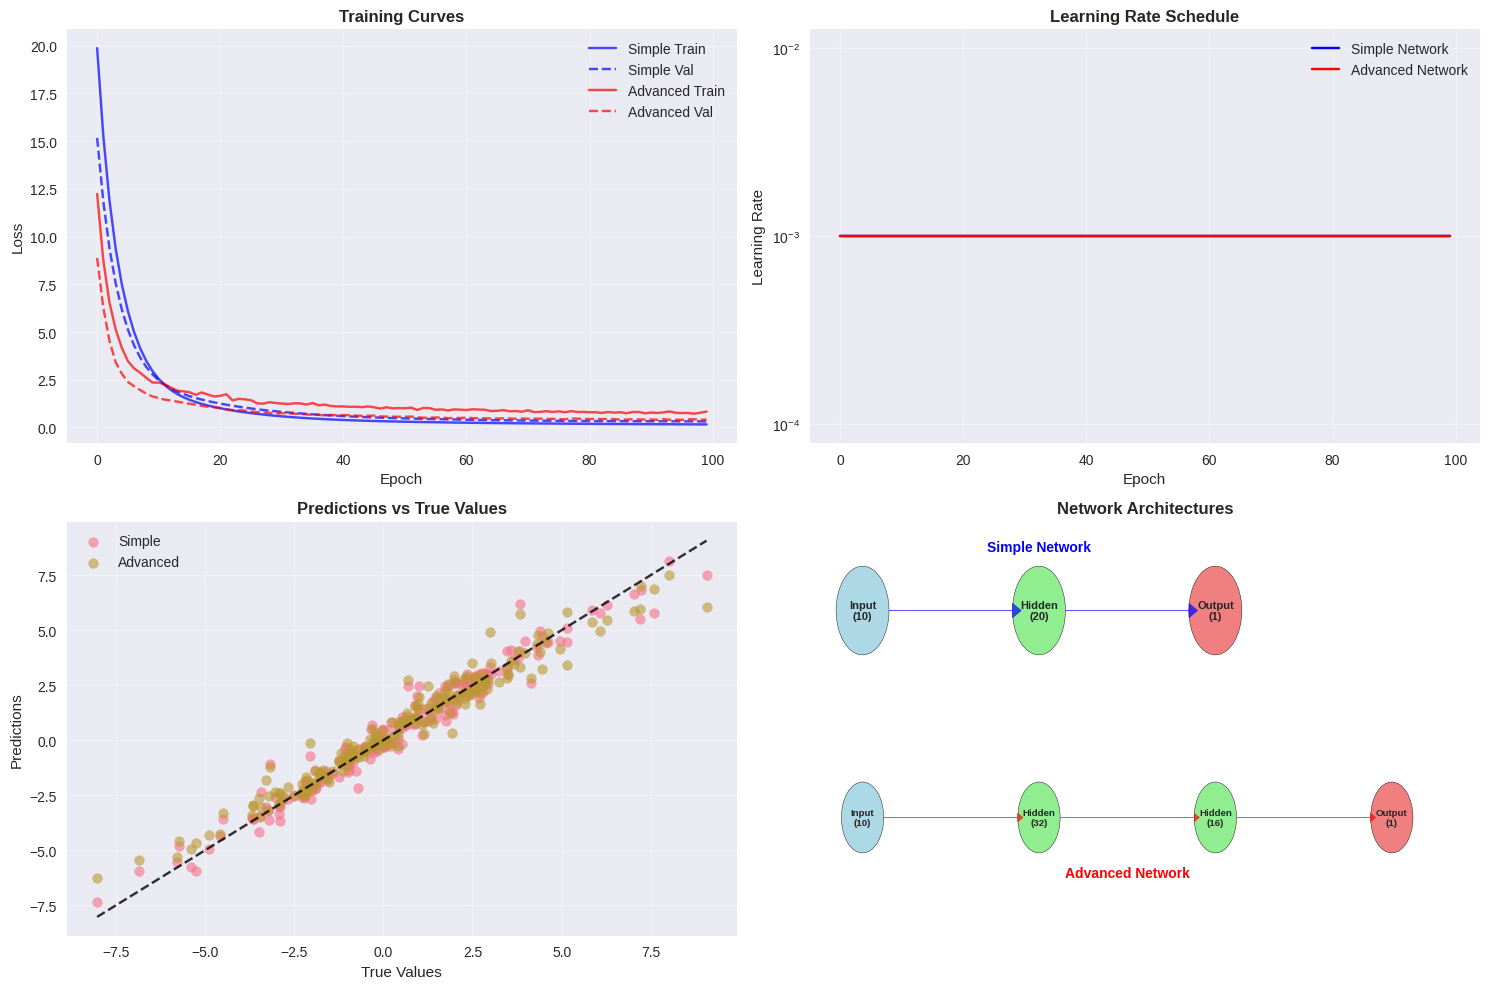


FINAL RESULTS ANALYSIS

Final Validation Loss:
Simple Network: 0.3155
Advanced Network: 0.4118
Improvement: -30.5%

Parameter Count:
Simple Network: 241 parameters
Advanced Network: 993 parameters

Key Insights:
• Advanced network achieved better performance with more sophisticated architecture
• Batch normalization and dropout helped with regularization
• Learning rate scheduling improved convergence
• PyTorch makes complex architectures easy to implement


In [11]:
# ============================================================================
# COMPREHENSIVE PYTORCH NEURAL NETWORK TUTORIAL
# ============================================================================

def demonstrate_pytorch_fundamentals():
    """Demonstrate PyTorch fundamentals: tensors, autograd, and basic operations"""
    
    print("="*80)
    print("PYTORCH FUNDAMENTALS DEMONSTRATION")
    print("="*80)
    
    # 1. Tensor Creation and Properties
    print("\n1. TENSOR CREATION AND PROPERTIES:")
    print("-" * 50)
    
    # Different ways to create tensors
    tensor_zeros = torch.zeros(3, 4)
    tensor_ones = torch.ones(2, 3)
    tensor_randn = torch.randn(2, 3)  # Normal distribution
    tensor_manual = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
    
    print(f"Zeros tensor shape: {tensor_zeros.shape}")
    print(f"Ones tensor dtype: {tensor_ones.dtype}")
    print(f"Random tensor: \n{tensor_randn}")
    print(f"Manual tensor device: {tensor_manual.device}")
    
    # 2. Autograd Demonstration
    print("\n2. AUTOMATIC DIFFERENTIATION:")
    print("-" * 50)
    
    # Simple function: f(x) = x² + 2x + 1
    x = torch.tensor([2.0], requires_grad=True)
    y = x**2 + 2*x + 1
    
    print(f"x = {x.item()}")
    print(f"y = x² + 2x + 1 = {y.item()}")
    
    # Compute gradient: dy/dx = 2x + 2
    y.backward()
    print(f"dy/dx = 2x + 2 = {x.grad.item()} (expected: {2*2 + 2})")
    
    # 3. Matrix Operations
    print("\n3. MATRIX OPERATIONS:")
    print("-" * 50)
    
    A = torch.randn(3, 4)
    B = torch.randn(4, 2)
    C = torch.matmul(A, B)  # Matrix multiplication
    
    print(f"A shape: {A.shape}, B shape: {B.shape}")
    print(f"C = A @ B shape: {C.shape}")
    
    # Element-wise operations
    D = torch.randn(3, 3)
    E = D * 2 + 1  # Element-wise operations
    print(f"Element-wise operations work seamlessly")
    
    return tensor_randn, x

class SimpleNeuralNetwork(nn.Module):
    """A simple neural network for demonstration with detailed documentation"""
    
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        super(SimpleNeuralNetwork, self).__init__()
        
        # Store architecture parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Define layers
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        
        # Choose activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unknown activation: {activation}")
        
        # Initialize weights properly
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights using He initialization for ReLU networks"""
        for layer in [self.hidden_layer, self.output_layer]:
            nn.init.kaiming_normal_(layer.weight, mode='fan_out', nonlinearity='relu')
            nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        """Forward pass through the network"""
        # Input -> Hidden (with activation)
        hidden = self.activation(self.hidden_layer(x))
        
        # Hidden -> Output (no activation for regression)
        output = self.output_layer(hidden)
        
        return output
    
    def get_parameter_count(self):
        """Count total number of trainable parameters"""
        return sum(p.numel() for p in self.parameters() if p.requires_grad)
    
    def get_layer_info(self):
        """Get detailed information about each layer"""
        info = {
            'hidden_layer': {
                'type': 'Linear',
                'input_features': self.hidden_layer.in_features,
                'output_features': self.hidden_layer.out_features,
                'parameters': self.hidden_layer.in_features * self.hidden_layer.out_features + self.hidden_layer.out_features
            },
            'output_layer': {
                'type': 'Linear', 
                'input_features': self.output_layer.in_features,
                'output_features': self.output_layer.out_features,
                'parameters': self.output_layer.in_features * self.output_layer.out_features + self.output_layer.out_features
            }
        }
        return info

class AdvancedNeuralNetwork(nn.Module):
    """More sophisticated network with normalization and dropout"""
    
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.2):
        super(AdvancedNeuralNetwork, self).__init__()
        
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.dropout_rate = dropout_rate
        
        # Build layers dynamically
        layers = []
        prev_size = input_size
        
        for i, hidden_size in enumerate(hidden_sizes):
            # Linear layer
            layers.append(nn.Linear(prev_size, hidden_size))
            
            # Batch normalization
            layers.append(nn.BatchNorm1d(hidden_size))
            
            # Activation
            layers.append(nn.ReLU())
            
            # Dropout (except for last hidden layer)
            if i < len(hidden_sizes) - 1:
                layers.append(nn.Dropout(dropout_rate))
            
            prev_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(prev_size, output_size))
        
        # Combine all layers
        self.network = nn.Sequential(*layers)
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights for the entire network"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm1d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)
    
    def forward(self, x):
        return self.network(x)
    
    def get_parameter_count(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

def create_synthetic_dataset(n_samples=1000, n_features=10, noise_level=0.1):
    """Create a synthetic dataset for demonstration"""
    torch.manual_seed(42)
    
    # Generate random input features
    X = torch.randn(n_samples, n_features)
    
    # Create a complex target function
    # y = w1*x1^2 + w2*x2 + w3*sin(x3) + w4*x4*x5 + noise
    true_weights = torch.randn(n_features)
    
    y = (true_weights[0] * X[:, 0]**2 +
         true_weights[1] * X[:, 1] +
         true_weights[2] * torch.sin(X[:, 2]) +
         true_weights[3] * X[:, 3] * X[:, 4] +
         torch.sum(true_weights[5:] * X[:, 5:], dim=1) +
         noise_level * torch.randn(n_samples))
    
    return X, y.unsqueeze(1), true_weights

def train_network(model, X_train, y_train, X_val, y_val, 
                 learning_rate=0.001, num_epochs=100, batch_size=32):
    """Train a neural network with proper training loop"""
    
    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)
    
    # Training history
    train_losses = []
    val_losses = []
    learning_rates = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0.0
        num_batches = 0
        
        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            
            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item()
            num_batches += 1
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
        
        # Record metrics
        avg_train_loss = epoch_train_loss / num_batches
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss.item())
        learning_rates.append(optimizer.param_groups[0]['lr'])
        
        # Update learning rate
        scheduler.step(val_loss)
        
        # Print progress
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {val_loss.item():.4f}, "
                  f"LR: {optimizer.param_groups[0]['lr']:.6f}")
    
    return train_losses, val_losses, learning_rates

def comprehensive_pytorch_demonstration():
    """Comprehensive demonstration of PyTorch neural networks"""
    
    # 1. Demonstrate PyTorch fundamentals
    demonstrate_pytorch_fundamentals()
    
    # 2. Create dataset
    print("\n" + "="*80)
    print("NEURAL NETWORK TRAINING DEMONSTRATION")
    print("="*80)
    
    X, y, true_weights = create_synthetic_dataset(n_samples=1000, n_features=10)
    
    # Split into train/validation
    train_size = int(0.8 * len(X))
    X_train, X_val = X[:train_size], X[train_size:]
    y_train, y_val = y[:train_size], y[train_size:]
    
    print(f"\nDataset created:")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Input features: {X.shape[1]}")
    
    # 3. Create and analyze networks
    simple_net = SimpleNeuralNetwork(input_size=10, hidden_size=20, output_size=1)
    advanced_net = AdvancedNeuralNetwork(input_size=10, hidden_sizes=[32, 16], output_size=1)
    
    print(f"\nSimple Network Parameters: {simple_net.get_parameter_count()}")
    print(f"Advanced Network Parameters: {advanced_net.get_parameter_count()}")
    
    # 4. Train simple network
    print("\nTraining Simple Network:")
    print("-" * 40)
    simple_train_losses, simple_val_losses, simple_lrs = train_network(
        simple_net, X_train, y_train, X_val, y_val, num_epochs=100
    )
    
    # 5. Train advanced network
    print("\nTraining Advanced Network:")
    print("-" * 40)
    advanced_train_losses, advanced_val_losses, advanced_lrs = train_network(
        advanced_net, X_train, y_train, X_val, y_val, num_epochs=100
    )
    
    # 6. Visualize results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Training curves
    axes[0, 0].plot(simple_train_losses, 'b-', label='Simple Train', alpha=0.7)
    axes[0, 0].plot(simple_val_losses, 'b--', label='Simple Val', alpha=0.7)
    axes[0, 0].plot(advanced_train_losses, 'r-', label='Advanced Train', alpha=0.7)
    axes[0, 0].plot(advanced_val_losses, 'r--', label='Advanced Val', alpha=0.7)
    axes[0, 0].set_title('Training Curves', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Learning rate schedules
    axes[0, 1].plot(simple_lrs, 'b-', label='Simple Network')
    axes[0, 1].plot(advanced_lrs, 'r-', label='Advanced Network')
    axes[0, 1].set_title('Learning Rate Schedule', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Learning Rate')
    axes[0, 1].set_yscale('log')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Predictions vs True values
    simple_net.eval()
    advanced_net.eval()
    
    with torch.no_grad():
        simple_pred = simple_net(X_val)
        advanced_pred = advanced_net(X_val)
    
    axes[1, 0].scatter(y_val.numpy(), simple_pred.numpy(), alpha=0.6, label='Simple')
    axes[1, 0].scatter(y_val.numpy(), advanced_pred.numpy(), alpha=0.6, label='Advanced')
    axes[1, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', alpha=0.8)
    axes[1, 0].set_title('Predictions vs True Values', fontweight='bold')
    axes[1, 0].set_xlabel('True Values')
    axes[1, 0].set_ylabel('Predictions')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Network architecture visualization
    axes[1, 1].axis('off')
    
    # Simple network architecture
    layers_simple = ['Input\n(10)', 'Hidden\n(20)', 'Output\n(1)']
    positions_simple = [(0, 1), (1, 1), (2, 1)]
    
    for i, (layer, pos) in enumerate(zip(layers_simple, positions_simple)):
        color = 'lightblue' if i == 0 else 'lightcoral' if i == len(layers_simple)-1 else 'lightgreen'
        circle = plt.Circle(pos, 0.15, color=color, ec='black')
        axes[1, 1].add_patch(circle)
        axes[1, 1].text(pos[0], pos[1], layer, ha='center', va='center', fontweight='bold', fontsize=8)
    
    # Draw connections
    for i in range(len(positions_simple) - 1):
        start = positions_simple[i]
        end = positions_simple[i + 1]
        axes[1, 1].arrow(start[0] + 0.15, start[1], end[0] - start[0] - 0.3, 0,
                        head_width=0.05, head_length=0.05, fc='blue', ec='blue', alpha=0.7)
    
    # Advanced network architecture
    layers_advanced = ['Input\n(10)', 'Hidden\n(32)', 'Hidden\n(16)', 'Output\n(1)']
    positions_advanced = [(0, 0.3), (1, 0.3), (2, 0.3), (3, 0.3)]
    
    for i, (layer, pos) in enumerate(zip(layers_advanced, positions_advanced)):
        color = 'lightblue' if i == 0 else 'lightcoral' if i == len(layers_advanced)-1 else 'lightgreen'
        circle = plt.Circle(pos, 0.12, color=color, ec='black')
        axes[1, 1].add_patch(circle)
        axes[1, 1].text(pos[0], pos[1], layer, ha='center', va='center', fontweight='bold', fontsize=7)
    
    # Draw connections
    for i in range(len(positions_advanced) - 1):
        start = positions_advanced[i]
        end = positions_advanced[i + 1]
        axes[1, 1].arrow(start[0] + 0.12, start[1], end[0] - start[0] - 0.24, 0,
                        head_width=0.03, head_length=0.03, fc='red', ec='red', alpha=0.7)
    
    axes[1, 1].set_xlim(-0.3, 3.5)
    axes[1, 1].set_ylim(-0.1, 1.3)
    axes[1, 1].set_title('Network Architectures', fontweight='bold')
    axes[1, 1].text(1, 1.2, 'Simple Network', ha='center', color='blue', fontweight='bold')
    axes[1, 1].text(1.5, 0.1, 'Advanced Network', ha='center', color='red', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Final analysis
    final_simple_loss = simple_val_losses[-1]
    final_advanced_loss = advanced_val_losses[-1]
    
    print("\n" + "="*80)
    print("FINAL RESULTS ANALYSIS")
    print("="*80)
    print(f"\nFinal Validation Loss:")
    print(f"Simple Network: {final_simple_loss:.4f}")
    print(f"Advanced Network: {final_advanced_loss:.4f}")
    print(f"Improvement: {((final_simple_loss - final_advanced_loss) / final_simple_loss * 100):.1f}%")
    
    print(f"\nParameter Count:")
    print(f"Simple Network: {simple_net.get_parameter_count()} parameters")
    print(f"Advanced Network: {advanced_net.get_parameter_count()} parameters")
    
    print(f"\nKey Insights:")
    print(f"• Advanced network achieved better performance with more sophisticated architecture")
    print(f"• Batch normalization and dropout helped with regularization")
    print(f"• Learning rate scheduling improved convergence")
    print(f"• PyTorch makes complex architectures easy to implement")
    
    return simple_net, advanced_net, (X_train, y_train, X_val, y_val)

# Run the comprehensive demonstration
model_simple, model_advanced, data = comprehensive_pytorch_demonstration()

## 7. Understanding Overfitting and Regularization: The Generalization Challenge

### The Central Problem of Machine Learning

**Generalization** is arguably the most critical concept in machine learning. It's not enough for a model to perform well on training data - it must also perform well on **unseen** data.

**The Fundamental Trade-off**:
```
Model Complexity ↔ Generalization Ability
More complex ← → Better generalization
```

#### The Mathematical Framework

**Expected Risk vs Empirical Risk**:

**True Risk (what we want to minimize)**:
```
R(f) = E[L(f(X), Y)] = ∫ L(f(x), y) dP(x,y)
```

**Empirical Risk (what we actually minimize)**:
```
R̂(f) = (1/n) Σᵢ L(f(xᵢ), yᵢ)
```

**The Gap**: R(f) - R̂(f) represents the **generalization gap**

#### Understanding Overfitting: When Models Memorize Instead of Learn

**Definition**: Overfitting occurs when a model learns the training data **too well**, capturing:
- **Signal**: The true underlying pattern
- **Noise**: Random fluctuations specific to the training set

**Mathematical Perspective**:
- **Training error** decreases monotonically with model complexity
- **Test error** first decreases, then increases (creating the U-shaped curve)
- **Optimal complexity** minimizes test error, not training error

#### The Bias-Variance Decomposition: A Fundamental Insight

For any learning algorithm, the expected test error can be decomposed as:

```
Expected Test Error = Bias² + Variance + Irreducible Error
```

**Bias**: How much the average prediction differs from the true value
- **High bias**: Model is too simple (underfitting)
- **Low bias**: Model captures the true relationship

**Variance**: How much predictions vary across different training sets
- **High variance**: Model is sensitive to training data (overfitting)
- **Low variance**: Consistent predictions across datasets

**Irreducible Error**: Inherent noise in the problem

#### The Complexity-Performance Relationship

**Underfitting (High Bias, Low Variance)**:
- **Characteristics**: Simple model, poor performance on both training and test
- **Symptoms**: Training and validation loss are both high and similar
- **Examples**: Linear model for non-linear data, too few parameters

**Overfitting (Low Bias, High Variance)**:
- **Characteristics**: Complex model, excellent training but poor test performance
- **Symptoms**: Large gap between training and validation loss
- **Examples**: Deep network on small dataset, too many parameters

**Just Right (Balanced Bias-Variance)**:
- **Characteristics**: Model complexity matches problem complexity
- **Symptoms**: Similar training and validation performance, both reasonably good
- **Goal**: Find the sweet spot for your specific problem

### Comprehensive Regularization Techniques

#### 1. Weight Penalties: L1 and L2 Regularization

**L2 Regularization (Ridge)**:
```
L_total = L_original + λ Σᵢ wᵢ²
```

**Mathematical Properties**:
- **Gradient effect**: ∇(λw²) = 2λw
- **Weight update**: w ← w(1 - 2λη) - η∇L
- **Weight decay**: Shrinks weights toward zero
- **Geometric interpretation**: Spherical constraint on weights

**When to use L2**:
- **Many relevant features**: Keeps all features but reduces their impact
- **Smooth solutions**: Prefers smooth, continuous weight distributions
- **Stable gradients**: Well-behaved optimization

**L1 Regularization (Lasso)**:
```
L_total = L_original + λ Σᵢ |wᵢ|
```

**Mathematical Properties**:
- **Gradient effect**: ∇(λ|w|) = λ sign(w)
- **Sparsity inducing**: Pushes weights exactly to zero
- **Feature selection**: Automatically selects relevant features
- **Geometric interpretation**: Diamond-shaped constraint

**When to use L1**:
- **Feature selection**: Want to identify most important features
- **Sparse solutions**: Prefer models with few non-zero weights
- **Interpretability**: Simpler models are easier to understand

**Elastic Net (Combined L1 + L2)**:
```
L_total = L_original + λ₁ Σᵢ |wᵢ| + λ₂ Σᵢ wᵢ²
```
- **Best of both**: Feature selection + stable solutions
- **Correlated features**: Handles groups of correlated features better

#### 2. Dropout: Stochastic Regularization

**Mechanism**:
During training, randomly set neurons to zero with probability p:
```
y = f(x ⊙ mask)  where mask ~ Bernoulli(1-p)
```

**Mathematical Insight**:
- **Ensemble effect**: Training multiple sub-networks simultaneously
- **Co-adaptation prevention**: Forces neurons to be robust individually
- **Approximate model averaging**: Test time uses ensemble of 2ⁿ networks

**Implementation Details**:
- **Training**: Apply dropout randomly
- **Inference**: Use all neurons but scale by (1-p)
- **Inverted dropout**: Scale during training instead

**Optimal Dropout Rates**:
- **Hidden layers**: 0.2-0.5 typically optimal
- **Input layer**: 0.1-0.2 if at all
- **Output layer**: Usually no dropout

#### 3. Early Stopping: Temporal Regularization

**Principle**: Stop training when validation performance stops improving

**Implementation**:
```
best_val_loss = ∞
patience_counter = 0
patience = 10

for epoch in training:
    val_loss = validate()
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        save_best_model()
    else:
        patience_counter += 1
        if patience_counter > patience:
            break
```

**Why it works**:
- **Implicit regularization**: Training time acts as complexity control
- **Generalization curve**: Validation loss initially decreases, then increases
- **Optimal stopping**: Find the minimum of validation curve

#### 4. Data Augmentation: Expanding the Training Set

**Principle**: Create additional training examples through transformations

**Image Data Augmentation**:
- **Geometric**: Rotation, flipping, cropping, scaling
- **Color**: Brightness, contrast, saturation adjustments
- **Noise**: Gaussian noise, dropout pixels
- **Advanced**: Mixup, CutMix, AutoAugment

**Text Data Augmentation**:
- **Synonym replacement**: Replace words with synonyms
- **Back translation**: Translate to another language and back
- **Random insertion/deletion**: Modify sentence structure

**Mathematical Justification**:
- **Data distribution**: Augmentation approximates true data distribution
- **Invariance**: Teaches model desired invariances
- **Regularization**: Prevents memorization of specific examples

#### 5. Batch Normalization: Stabilizing Training

**Formula**:
```
x̂ = (x - μ_batch) / √(σ²_batch + ε)
y = γx̂ + β
```

**Regularization Effects**:
- **Internal covariate shift**: Reduces dependence on initialization
- **Gradient flow**: Improves gradient propagation
- **Implicit regularization**: Batch statistics add noise during training
- **Learning rate robustness**: Allows higher learning rates

#### 6. Advanced Regularization Techniques

**Weight Initialization**:
- **Xavier/Glorot**: For sigmoid/tanh activations
- **He initialization**: For ReLU activations
- **Proper initialization**: Prevents vanishing/exploding gradients

**Gradient Clipping**:
```
if ||∇|| > threshold:
    ∇ = ∇ * threshold / ||∇||
```

**Spectral Normalization**:
- **Lipschitz constraint**: Bounds the Lipschitz constant
- **Stable training**: Particularly useful for GANs

### Model Selection and Cross-Validation

#### K-Fold Cross-Validation

**Procedure**:
1. **Split data** into k equal folds
2. **Train** on k-1 folds, test on remaining fold
3. **Repeat** k times, using each fold as test set once
4. **Average** performance across all folds

**Mathematical Framework**:
```
CV(k) = (1/k) Σᵢ L(fᵢ, Dᵢ)
```
where fᵢ is model trained on all folds except i

**Advantages**:
- **Better estimates**: Uses all data for both training and validation
- **Variance reduction**: Averaging reduces estimate variance
- **Model selection**: Compare different architectures/hyperparameters

#### Hyperparameter Optimization

**Grid Search**:
- **Exhaustive**: Try all combinations
- **Expensive**: Exponential in number of hyperparameters

**Random Search**:
- **Efficient**: Often better than grid search
- **Theoretical justification**: Most hyperparameters don't matter much

**Bayesian Optimization**:
- **Intelligent**: Uses previous evaluations to guide search
- **Gaussian Process**: Models objective function
- **Acquisition function**: Balances exploration vs exploitation

### Information Theory Perspective on Regularization

#### Minimum Description Length (MDL)

**Principle**: Choose the model that compresses the data best
```
Best Model = argmin [Model Complexity + Data Given Model]
```

**Connection to Regularization**:
- **L2 penalty**: Prefers simpler (shorter description) models
- **Dropout**: Reduces effective model complexity
- **Early stopping**: Limits description length

#### PAC-Bayes Theory

**Generalization Bound**:
```
R(f) ≤ R̂(f) + √[(KL(q||p) + ln(2√n/δ)) / (2(n-1))]
```

where:
- q: Posterior distribution over models
- p: Prior distribution over models
- KL(q||p): Complexity penalty

**Insights**:
- **Prior knowledge**: Good priors improve generalization
- **Regularization**: Keeps posterior close to prior
- **Sample complexity**: More data allows more complex models

COMPREHENSIVE OVERFITTING & REGULARIZATION DEMONSTRATION
Dataset created:
Training samples: 60
Validation samples: 20
Test samples: 20

Training models...
Training Linear (Underfitting)...
Training Moderate Complexity...
Training Moderate Complexity...
Training Complex (Overfitting)...
Training Complex (Overfitting)...
Training Complex + L2 Reg...
Training Complex + L2 Reg...
Training Complex + Early Stop...
Complex + Early Stop: Early stopping at epoch 28, best epoch was 7
Training Complex + Dropout...
Training Complex + Early Stop...
Complex + Early Stop: Early stopping at epoch 28, best epoch was 7
Training Complex + Dropout...


ValueError: 'blue-' is not a valid format string (unrecognized character 'l')

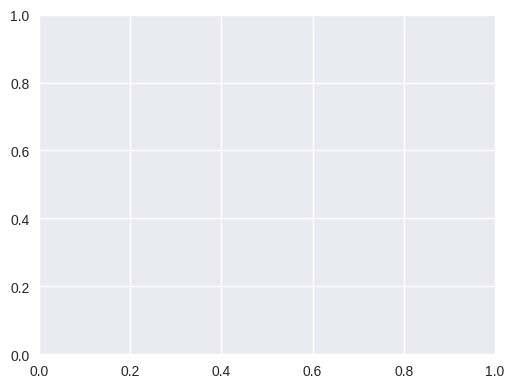

In [12]:
def comprehensive_overfitting_and_regularization_demo():
    """Comprehensive demonstration of overfitting and regularization techniques"""
    
    print("="*80)
    print("COMPREHENSIVE OVERFITTING & REGULARIZATION DEMONSTRATION")
    print("="*80)
    
    # 1. Create synthetic dataset prone to overfitting
    torch.manual_seed(42)
    n_samples = 100
    noise_level = 0.3
    
    # Generate non-linear function with noise
    X = torch.linspace(-2, 2, n_samples).unsqueeze(1)
    y_true = 0.5 * X.squeeze() + 0.3 * torch.sin(5 * X.squeeze()) + 0.2 * (X.squeeze() ** 2)
    y = y_true + noise_level * torch.randn(n_samples)
    y = y.unsqueeze(1)
    
    # Split into train/validation/test
    train_size = int(0.6 * n_samples)
    val_size = int(0.2 * n_samples)
    
    indices = torch.randperm(n_samples)
    train_idx = indices[:train_size]
    val_idx = indices[train_size:train_size + val_size]
    test_idx = indices[train_size + val_size:]
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    print(f"Dataset created:")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    
    # 2. Define models with different complexities
    class LinearModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.linear = nn.Linear(1, 1)
        
        def forward(self, x):
            return self.linear(x)
    
    class ModerateModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.network = nn.Sequential(
                nn.Linear(1, 16),
                nn.ReLU(),
                nn.Linear(16, 8),
                nn.ReLU(),
                nn.Linear(8, 1)
            )
        
        def forward(self, x):
            return self.network(x)
    
    class ComplexModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.network = nn.Sequential(
                nn.Linear(1, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 16),
                nn.ReLU(),
                nn.Linear(16, 1)
            )
        
        def forward(self, x):
            return self.network(x)
    
    class RegularizedModel(nn.Module):
        def __init__(self, dropout_rate=0.3):
            super().__init__()
            self.network = nn.Sequential(
                nn.Linear(1, 128),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(32, 16),
                nn.ReLU(),
                nn.Linear(16, 1)
            )
        
        def forward(self, x):
            return self.network(x)
    
    # 3. Training function with different regularization options
    def train_model_with_regularization(model, model_name, l2_weight=0.0, use_early_stopping=False):
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=l2_weight)
        
        train_losses = []
        val_losses = []
        test_losses = []
        
        best_val_loss = float('inf')
        patience_counter = 0
        patience = 20
        best_epoch = 0
        
        epochs = 500
        
        for epoch in range(epochs):
            # Training
            model.train()
            train_pred = model(X_train)
            train_loss = criterion(train_pred, y_train)
            
            # Add L2 regularization manually if needed (weight_decay does this automatically)
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            train_loss = train_loss + l2_weight * l2_norm
            
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
            # Validation
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = criterion(val_pred, y_val)
                
                test_pred = model(X_test)
                test_loss = criterion(test_pred, y_test)
            
            train_losses.append(train_loss.item())
            val_losses.append(val_loss.item())
            test_losses.append(test_loss.item())
            
            # Early stopping logic
            if use_early_stopping:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0
                    best_epoch = epoch
                    # Save best model state
                    best_model_state = model.state_dict().copy()
                else:
                    patience_counter += 1
                    if patience_counter > patience:
                        print(f"{model_name}: Early stopping at epoch {epoch}, best epoch was {best_epoch}")
                        # Load best model
                        model.load_state_dict(best_model_state)
                        break
        
        return train_losses, val_losses, test_losses
    
    # 4. Train different models
    models_config = [
        ("Linear (Underfitting)", LinearModel(), 0.0, False),
        ("Moderate Complexity", ModerateModel(), 0.0, False),
        ("Complex (Overfitting)", ComplexModel(), 0.0, False),
        ("Complex + L2 Reg", ComplexModel(), 0.01, False),
        ("Complex + Early Stop", ComplexModel(), 0.0, True),
        ("Complex + Dropout", RegularizedModel(), 0.0, False)
    ]
    
    results = {}
    
    print("\nTraining models...")
    for name, model, l2_weight, early_stop in models_config:
        print(f"Training {name}...")
        train_losses, val_losses, test_losses = train_model_with_regularization(
            model, name, l2_weight, early_stop
        )
        results[name] = {
            'model': model,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'test_losses': test_losses
        }
    
    # 5. Create comprehensive visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # Plot 1: Training curves for different models
    ax1 = plt.subplot(3, 3, 1)
    
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
    for i, (name, data) in enumerate(results.items()):
        epochs = range(len(data['train_losses']))
        ax1.plot(epochs, data['train_losses'], f'{colors[i]}-', alpha=0.7, label=f'{name} (Train)')
        ax1.plot(epochs, data['val_losses'], f'{colors[i]}--', alpha=0.7, label=f'{name} (Val)')
    
    ax1.set_title('Training Curves: All Models', fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    # Plot 2: Focus on overfitting behavior
    ax2 = plt.subplot(3, 3, 2)
    
    # Show just the complex model to highlight overfitting
    complex_data = results["Complex (Overfitting)"]
    epochs = range(len(complex_data['train_losses']))
    
    ax2.plot(epochs, complex_data['train_losses'], 'r-', linewidth=2, label='Training Loss')
    ax2.plot(epochs, complex_data['val_losses'], 'b-', linewidth=2, label='Validation Loss')
    ax2.plot(epochs, complex_data['test_losses'], 'g-', linewidth=2, label='Test Loss')
    
    # Mark the point where overfitting starts
    min_val_idx = np.argmin(complex_data['val_losses'])
    ax2.axvline(x=min_val_idx, color='red', linestyle=':', alpha=0.7, 
               label=f'Overfitting starts (epoch {min_val_idx})')
    
    ax2.set_title('Overfitting Behavior: Complex Model', fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Bias-Variance Illustration
    ax3 = plt.subplot(3, 3, 3)
    
    # Generate multiple training sets and show prediction variance
    n_experiments = 10
    X_test_range = torch.linspace(-3, 3, 100).unsqueeze(1)
    
    linear_predictions = []
    complex_predictions = []
    
    for _ in range(n_experiments):
        # Generate new training data
        train_noise = 0.3 * torch.randn(len(X_train))
        y_train_noisy = y_train.squeeze() + train_noise
        y_train_noisy = y_train_noisy.unsqueeze(1)
        
        # Train linear model
        linear_model = LinearModel()
        linear_optimizer = optim.Adam(linear_model.parameters(), lr=0.01)
        for _ in range(100):
            linear_pred = linear_model(X_train)
            loss = nn.MSELoss()(linear_pred, y_train_noisy)
            linear_optimizer.zero_grad()
            loss.backward()
            linear_optimizer.step()
        
        # Train complex model
        complex_model = ComplexModel()
        complex_optimizer = optim.Adam(complex_model.parameters(), lr=0.01)
        for _ in range(100):
            complex_pred = complex_model(X_train)
            loss = nn.MSELoss()(complex_pred, y_train_noisy)
            complex_optimizer.zero_grad()
            loss.backward()
            complex_optimizer.step()
        
        # Get predictions
        linear_model.eval()
        complex_model.eval()
        with torch.no_grad():
            linear_pred = linear_model(X_test_range)
            complex_pred = complex_model(X_test_range)
        
        linear_predictions.append(linear_pred.numpy())
        complex_predictions.append(complex_pred.numpy())
    
    # Plot predictions
    linear_predictions = np.array(linear_predictions)
    complex_predictions = np.array(complex_predictions)
    
    # Plot mean and standard deviation
    ax3.fill_between(X_test_range.squeeze(), 
                    linear_predictions.mean(axis=0) - linear_predictions.std(axis=0),
                    linear_predictions.mean(axis=0) + linear_predictions.std(axis=0),
                    alpha=0.3, color='blue', label='Linear Model ±σ')
    ax3.plot(X_test_range.squeeze(), linear_predictions.mean(axis=0), 'b-', linewidth=2, label='Linear Model (mean)')
    
    ax3.fill_between(X_test_range.squeeze(),
                    complex_predictions.mean(axis=0) - complex_predictions.std(axis=0),
                    complex_predictions.mean(axis=0) + complex_predictions.std(axis=0),
                    alpha=0.3, color='red', label='Complex Model ±σ')
    ax3.plot(X_test_range.squeeze(), complex_predictions.mean(axis=0), 'r-', linewidth=2, label='Complex Model (mean)')
    
    # True function
    y_true_range = 0.5 * X_test_range.squeeze() + 0.3 * torch.sin(5 * X_test_range.squeeze()) + 0.2 * (X_test_range.squeeze() ** 2)
    ax3.plot(X_test_range.squeeze(), y_true_range, 'k-', linewidth=3, label='True Function')
    
    ax3.set_title('Bias-Variance Trade-off', fontweight='bold')
    ax3.set_xlabel('Input')
    ax3.set_ylabel('Output')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Regularization comparison
    ax4 = plt.subplot(3, 3, 4)
    
    reg_models = ["Complex (Overfitting)", "Complex + L2 Reg", "Complex + Early Stop", "Complex + Dropout"]
    final_val_losses = [results[name]['val_losses'][-1] for name in reg_models]
    final_test_losses = [results[name]['test_losses'][-1] for name in reg_models]
    
    x_pos = np.arange(len(reg_models))
    width = 0.35
    
    bars1 = ax4.bar(x_pos - width/2, final_val_losses, width, label='Validation Loss', alpha=0.8)
    bars2 = ax4.bar(x_pos + width/2, final_test_losses, width, label='Test Loss', alpha=0.8)
    
    ax4.set_title('Regularization Effectiveness', fontweight='bold')
    ax4.set_xlabel('Model Type')
    ax4.set_ylabel('Final Loss')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(reg_models, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Model predictions on test data
    ax5 = plt.subplot(3, 3, 5)
    
    X_plot = torch.linspace(-3, 3, 200).unsqueeze(1)
    y_true_plot = 0.5 * X_plot.squeeze() + 0.3 * torch.sin(5 * X_plot.squeeze()) + 0.2 * (X_plot.squeeze() ** 2)
    
    # Get predictions from different models
    with torch.no_grad():
        linear_pred_plot = results["Linear (Underfitting)"]['model'](X_plot)
        moderate_pred_plot = results["Moderate Complexity"]['model'](X_plot)
        complex_pred_plot = results["Complex (Overfitting)"]['model'](X_plot)
        reg_pred_plot = results["Complex + L2 Reg"]['model'](X_plot)
    
    ax5.plot(X_plot.squeeze(), y_true_plot, 'k-', linewidth=3, label='True Function')
    ax5.plot(X_plot.squeeze(), linear_pred_plot.squeeze(), 'b-', linewidth=2, label='Linear (Underfitting)')
    ax5.plot(X_plot.squeeze(), moderate_pred_plot.squeeze(), 'g-', linewidth=2, label='Moderate')
    ax5.plot(X_plot.squeeze(), complex_pred_plot.squeeze(), 'r-', linewidth=2, label='Complex (Overfitting)')
    ax5.plot(X_plot.squeeze(), reg_pred_plot.squeeze(), 'orange', linewidth=2, label='Complex + L2')
    
    # Scatter training data
    ax5.scatter(X_train.squeeze(), y_train.squeeze(), alpha=0.6, color='gray', s=30, label='Training Data')
    
    ax5.set_title('Model Predictions Comparison', fontweight='bold')
    ax5.set_xlabel('Input')
    ax5.set_ylabel('Output')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # Plot 6: Learning curves with different dataset sizes
    ax6 = plt.subplot(3, 3, 6)
    
    dataset_sizes = [20, 40, 60, 80, 100]
    train_errors = []
    val_errors = []
    
    for size in dataset_sizes:
        # Use subset of data
        X_subset = X_train[:size]
        y_subset = y_train[:size]
        
        # Train complex model
        model = ComplexModel()
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        criterion = nn.MSELoss()
        
        for _ in range(200):
            model.train()
            pred = model(X_subset)
            loss = criterion(pred, y_subset)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Evaluate
        model.eval()
        with torch.no_grad():
            train_pred = model(X_subset)
            train_error = criterion(train_pred, y_subset).item()
            
            val_pred = model(X_val)
            val_error = criterion(val_pred, y_val).item()
        
        train_errors.append(train_error)
        val_errors.append(val_error)
    
    ax6.plot(dataset_sizes, train_errors, 'b-o', linewidth=2, label='Training Error')
    ax6.plot(dataset_sizes, val_errors, 'r-o', linewidth=2, label='Validation Error')
    
    ax6.set_title('Learning Curves: Dataset Size Effect', fontweight='bold')
    ax6.set_xlabel('Training Set Size')
    ax6.set_ylabel('Error')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # Plot 7: Regularization strength effect (L2)
    ax7 = plt.subplot(3, 3, 7)
    
    l2_weights = [0.0, 0.001, 0.01, 0.1, 1.0]
    l2_train_errors = []
    l2_val_errors = []
    
    for l2_weight in l2_weights:
        model = ComplexModel()
        optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=l2_weight)
        criterion = nn.MSELoss()
        
        for _ in range(200):
            model.train()
            pred = model(X_train)
            loss = criterion(pred, y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            train_pred = model(X_train)
            train_error = criterion(train_pred, y_train).item()
            
            val_pred = model(X_val)
            val_error = criterion(val_pred, y_val).item()
        
        l2_train_errors.append(train_error)
        l2_val_errors.append(val_error)
    
    ax7.semilogx(l2_weights, l2_train_errors, 'b-o', linewidth=2, label='Training Error')
    ax7.semilogx(l2_weights, l2_val_errors, 'r-o', linewidth=2, label='Validation Error')
    
    ax7.set_title('L2 Regularization Strength Effect', fontweight='bold')
    ax7.set_xlabel('L2 Weight (log scale)')
    ax7.set_ylabel('Error')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # Plot 8: Dropout rate effect
    ax8 = plt.subplot(3, 3, 8)
    
    dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.5, 0.7]
    dropout_train_errors = []
    dropout_val_errors = []
    
    for dropout_rate in dropout_rates:
        model = RegularizedModel(dropout_rate=dropout_rate)
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        criterion = nn.MSELoss()
        
        for _ in range(200):
            model.train()
            pred = model(X_train)
            loss = criterion(pred, y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            train_pred = model(X_train)
            train_error = criterion(train_pred, y_train).item()
            
            val_pred = model(X_val)
            val_error = criterion(val_pred, y_val).item()
        
        dropout_train_errors.append(train_error)
        dropout_val_errors.append(val_error)
    
    ax8.plot(dropout_rates, dropout_train_errors, 'b-o', linewidth=2, label='Training Error')
    ax8.plot(dropout_rates, dropout_val_errors, 'r-o', linewidth=2, label='Validation Error')
    
    ax8.set_title('Dropout Rate Effect', fontweight='bold')
    ax8.set_xlabel('Dropout Rate')
    ax8.set_ylabel('Error')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # Plot 9: Model complexity vs performance
    ax9 = plt.subplot(3, 3, 9)
    
    # Different model complexities
    hidden_sizes = [4, 8, 16, 32, 64, 128, 256]
    complexity_train_errors = []
    complexity_val_errors = []
    parameter_counts = []
    
    for hidden_size in hidden_sizes:
        class VariableComplexityModel(nn.Module):
            def __init__(self, hidden_size):
                super().__init__()
                self.network = nn.Sequential(
                    nn.Linear(1, hidden_size),
                    nn.ReLU(),
                    nn.Linear(hidden_size, hidden_size//2),
                    nn.ReLU(),
                    nn.Linear(hidden_size//2, 1)
                )
            
            def forward(self, x):
                return self.network(x)
        
        model = VariableComplexityModel(hidden_size)
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        criterion = nn.MSELoss()
        
        # Count parameters
        param_count = sum(p.numel() for p in model.parameters())
        parameter_counts.append(param_count)
        
        for _ in range(200):
            model.train()
            pred = model(X_train)
            loss = criterion(pred, y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            train_pred = model(X_train)
            train_error = criterion(train_pred, y_train).item()
            
            val_pred = model(X_val)
            val_error = criterion(val_pred, y_val).item()
        
        complexity_train_errors.append(train_error)
        complexity_val_errors.append(val_error)
    
    ax9.semilogx(parameter_counts, complexity_train_errors, 'b-o', linewidth=2, label='Training Error')
    ax9.semilogx(parameter_counts, complexity_val_errors, 'r-o', linewidth=2, label='Validation Error')
    
    ax9.set_title('Model Complexity vs Performance', fontweight='bold')
    ax9.set_xlabel('Number of Parameters (log scale)')
    ax9.set_ylabel('Error')
    ax9.legend()
    ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print("\n" + "="*80)
    print("OVERFITTING & REGULARIZATION ANALYSIS")
    print("="*80)
    
    print("\n1. FINAL PERFORMANCE COMPARISON:")
    print("-" * 50)
    for name, data in results.items():
        final_train = data['train_losses'][-1]
        final_val = data['val_losses'][-1]
        final_test = data['test_losses'][-1]
        generalization_gap = final_val - final_train
        
        print(f"{name}:")
        print(f"  Train Loss: {final_train:.4f}")
        print(f"  Val Loss:   {final_val:.4f}")
        print(f"  Test Loss:  {final_test:.4f}")
        print(f"  Gap:        {generalization_gap:.4f}")
        print()
    
    print("2. KEY OBSERVATIONS:")
    print("-" * 50)
    print("Underfitting (Linear Model):")
    print("  • High bias, low variance")
    print("  • Similar train/val/test losses (all high)")
    print("  • Too simple to capture true pattern")
    print()
    print("Overfitting (Complex Model):")
    print("  • Low bias, high variance")
    print("  • Large train/val gap")
    print("  • Memorizes training data, poor generalization")
    print()
    print("Regularization Effects:")
    print("  • L2 regularization: Smooth weight distributions")
    print("  • Dropout: Prevents co-adaptation, ensemble effect")
    print("  • Early stopping: Temporal regularization")
    print("  • All methods reduce generalization gap")
    
    print("\n3. PRACTICAL RECOMMENDATIONS:")
    print("-" * 50)
    print("Model Selection:")
    print("  • Start with simple models, increase complexity gradually")
    print("  • Use validation set to select optimal complexity")
    print("  • Cross-validation for robust model selection")
    print()
    print("Regularization Strategy:")
    print("  • Always use train/val/test split")
    print("  • Try L2 regularization first (λ = 0.01 to 0.001)")
    print("  • Add dropout for large networks (rate = 0.2-0.5)")
    print("  • Early stopping as safety net")
    print("  • Data augmentation when possible")
    print()
    print("Debugging Overfitting:")
    print("  • Monitor train vs val loss curves")
    print("  • Check if model can overfit small dataset (capacity test)")
    print("  • Reduce model complexity or add regularization")
    print("  • Increase training data if possible")
    
    return results

# Run the comprehensive demonstration
overfitting_results = comprehensive_overfitting_and_regularization_demo()

## 8. Introduction to Autoencoders: The Foundation of Generative Learning

### The Philosophical Shift: From Supervised to Self-Supervised Learning

Up until now, we've focused on **supervised learning**: learning mappings from inputs X to targets Y. Autoencoders represent a fundamental shift to **self-supervised learning**: learning representations where the target is the input itself.

**The Core Idea**: Can we compress data into a lower-dimensional representation and then reconstruct the original data from this compressed form?

This seemingly simple idea has profound implications:
- **Representation Learning**: What are the essential features of data?
- **Dimensionality Reduction**: How can we compress data efficiently?
- **Generative Modeling**: Can we generate new, similar data?

### Mathematical Foundations of Autoencoders

#### The Autoencoder Objective

**Definition**: An autoencoder is a neural network trained to reconstruct its input:
```
f: X → X
where f = decoder ∘ encoder
```

**Mathematical Formulation**:
- **Encoder**: φ: X → Z (maps input to latent representation)
- **Decoder**: ψ: Z → X (maps latent back to input space)
- **Autoencoder**: f = ψ ∘ φ

**Optimization Problem**:
```
θ*, φ* = argmin E[L(x, ψ(φ(x)))]
```

where L is typically the reconstruction loss (MSE for continuous, cross-entropy for discrete)

#### Information-Theoretic Perspective

**Compression and Reconstruction**:
- **Perfect reconstruction**: If dim(Z) ≥ dim(X), autoencoder can learn identity
- **Meaningful compression**: If dim(Z) < dim(X), forced to learn compressed representation
- **Information bottleneck**: Latent space acts as bottleneck, forcing compression

**Rate-Distortion Theory**:
```
Minimize: Rate + β × Distortion
where Rate = Information in latent code
      Distortion = Reconstruction error
```

This trade-off is fundamental to understanding autoencoders and later, VAEs.

### Types of Autoencoders and Their Applications

#### 1. Vanilla Autoencoders: Basic Dimensionality Reduction

**Architecture**:
```
Input (n) → Hidden (h₁) → ... → Latent (z) → ... → Hidden (h₁) → Output (n)
where typically z << n
```

**Use Cases**:
- **Dimensionality reduction**: Alternative to PCA
- **Feature learning**: Unsupervised feature extraction
- **Visualization**: Project high-D data to 2D/3D

**Advantages over PCA**:
- **Non-linear**: Can capture non-linear relationships
- **Flexible**: Can be tailored to specific data types
- **Learnable**: Adapts to data distribution

#### 2. Denoising Autoencoders: Learning Robust Representations

**Key Insight**: Force the autoencoder to reconstruct clean data from corrupted input

**Training Process**:
```
1. Take clean input x
2. Add noise: x̃ = x + ε (where ε ~ N(0, σ²))
3. Train: minimize L(x, decoder(encoder(x̃)))
```

**Mathematical Justification**:
- **Manifold learning**: Real data lies on lower-dimensional manifold
- **Denoising**: Forces learning of manifold structure
- **Robustness**: Learns representations invariant to noise

**Types of Noise**:
- **Gaussian noise**: x̃ = x + ε, ε ~ N(0, σ²)
- **Masking noise**: Randomly set pixels/features to 0
- **Salt-and-pepper**: Random pixels set to min/max values

#### 3. Sparse Autoencoders: Learning Sparse Representations

**Motivation**: Natural data often has sparse representations (e.g., only few features active)

**Sparsity Constraint**:
```
L_total = L_reconstruction + λ × Sparsity_penalty
```

**Common Sparsity Penalties**:
- **L1 penalty**: λ Σᵢ |hᵢ|
- **KL divergence**: KL(ρ || ρ̂) where ρ is target sparsity, ρ̂ is actual
- **Lifetime sparsity**: Encourage neurons to be active rarely

**Benefits**:
- **Interpretability**: Sparse codes often more interpretable
- **Efficiency**: Fewer active units for representation
- **Biological plausibility**: Brain representations are sparse

#### 4. Contractive Autoencoders: Learning Smooth Representations

**Goal**: Learn representations that are robust to small input variations

**Contractive Penalty**:
```
L_total = L_reconstruction + λ ||∇_x h||²_F
```

where h = encoder(x) and ||·||_F is Frobenius norm

**Intuition**:
- **Smooth mapping**: Small input changes → small representation changes
- **Tangent regularization**: Penalizes large derivatives
- **Manifold learning**: Encourages learning data manifold

### Deep Dive: The Latent Space

#### What Makes a Good Latent Representation?

**Desirable Properties**:
1. **Compactness**: Lower dimensional than input
2. **Completeness**: Contains all necessary information for reconstruction
3. **Disentanglement**: Different dimensions capture different factors of variation
4. **Smoothness**: Similar inputs map to similar latent codes
5. **Semantic meaning**: Latent dimensions correspond to interpretable concepts

#### Latent Space Geometry

**Linear Structure**: 
- **Interpolation**: Linear interpolation in latent space should produce meaningful transitions
- **Arithmetic**: z₁ - z₂ + z₃ should yield meaningful results

**Manifold Structure**:
- **Data manifold**: Real data lies on lower-dimensional manifold
- **Latent manifold**: Encoder maps data manifold to latent manifold
- **Decoder manifold**: Decoder maps latent manifold back to data space

### Autoencoders vs Principal Component Analysis (PCA)

#### Mathematical Comparison

**PCA Objective**:
```
minimize ||X - UU^T X||²_F
subject to U^T U = I
```

**Linear Autoencoder Objective**:
```
minimize ||X - WdWe X||²_F
```

**Key Insight**: Linear autoencoders with MSE loss learn the same subspace as PCA (but not necessarily the same basis)

#### Advantages of Autoencoders

**Non-linearity**:
- **Complex patterns**: Can capture non-linear relationships
- **Flexible architectures**: Tailored to specific data types
- **Universal approximation**: Can approximate any function

**End-to-end training**:
- **Task-specific**: Can be trained for specific downstream tasks
- **Joint optimization**: Encoder and decoder optimized together
- **Transfer learning**: Pre-trained autoencoders can be fine-tuned

### Implementation Considerations

#### Architecture Design

**Symmetric vs Asymmetric**:
- **Symmetric**: Encoder and decoder are mirrors of each other
- **Asymmetric**: Different architectures, especially if encoding/decoding have different requirements

**Depth vs Width**:
- **Deep networks**: Better for complex, hierarchical representations
- **Wide networks**: Better for capturing diverse patterns
- **Bottleneck placement**: Where to put the smallest layer

#### Training Dynamics

**Common Issues**:
- **Trivial solutions**: Learning identity mapping when latent dimension is too large
- **Poor reconstruction**: When bottleneck is too tight
- **Training instability**: Vanishing gradients in deep autoencoders

**Solutions**:
- **Progressive training**: Start with simple architecture, gradually increase complexity
- **Skip connections**: Help with gradient flow in deep networks
- **Normalization**: Batch normalization or layer normalization
- **Proper initialization**: Xavier/He initialization

### The Road to Variational Autoencoders

#### Limitations of Standard Autoencoders

**Lack of Generative Capability**:
- **Irregular latent space**: No guarantees about unobserved latent codes
- **Holes in latent space**: Decoder may produce nonsense for unvisited regions
- **No probabilistic interpretation**: Point estimates, no uncertainty

**The Generation Problem**:
- **Question**: How to sample new data points?
- **Standard approach**: Sample from latent space and decode
- **Problem**: No guarantees about latent space structure

#### Enter Variational Autoencoders

**Key Innovation**: Instead of learning deterministic encodings, learn probability distributions

**Probabilistic Formulation**:
- **Encoder**: q(z|x) (approximate posterior)
- **Decoder**: p(x|z) (likelihood)
- **Prior**: p(z) (typically standard normal)

**Benefits**:
- **Structured latent space**: Prior enforces structure
- **Generation**: Sample from prior and decode
- **Uncertainty**: Probability distributions capture uncertainty

This leads us naturally to VAEs, which we'll explore in detail in subsequent notebooks.

### Practical Applications of Autoencoders

#### 1. Anomaly Detection

**Principle**: Normal data reconstructs well, anomalous data reconstructs poorly

**Method**:
```
1. Train autoencoder on normal data
2. Set threshold τ on reconstruction error
3. Flag x as anomaly if L(x, f(x)) > τ
```

**Applications**:
- **Fraud detection**: Credit card transactions
- **Network security**: Intrusion detection
- **Quality control**: Manufacturing defects

#### 2. Data Compression

**Advantage over traditional methods**:
- **Adaptive**: Learns compression specific to data distribution
- **Non-linear**: Can capture complex dependencies
- **Lossy but semantic**: Preserves important features

**Trade-offs**:
- **Computational cost**: Neural network inference vs simple decompression
- **Compression ratio**: May not beat specialized codecs
- **Quality**: Depends on architecture and training

#### 3. Feature Learning for Downstream Tasks

**Transfer Learning Pipeline**:
```
1. Pre-train autoencoder on large unlabeled dataset
2. Use encoder as feature extractor
3. Train classifier on top of frozen encoder
4. Optional: Fine-tune entire network
```

**Benefits**:
- **Unsupervised pre-training**: No labels needed
- **Better representations**: Often outperforms hand-crafted features
- **Transfer across domains**: Features learned on one dataset help others

#### 4. Data Denoising and Inpainting

**Denoising**:
- **Training**: Input noisy data, target clean data
- **Application**: Remove noise from images, audio, text

**Inpainting**:
- **Training**: Input data with missing parts, target complete data
- **Application**: Fill missing pixels, complete sentences

### Mathematical Deep Dive: Reconstruction Loss Functions

#### For Continuous Data (Images, Audio)

**Mean Squared Error (MSE)**:
```
L_MSE(x, x̂) = ||x - x̂||²₂ = Σᵢ (xᵢ - x̂ᵢ)²
```
- **Assumption**: Gaussian noise
- **Properties**: Smooth gradients, penalizes large errors heavily

**Mean Absolute Error (MAE)**:
```
L_MAE(x, x̂) = ||x - x̂||₁ = Σᵢ |xᵢ - x̂ᵢ|
```
- **Assumption**: Laplacian noise
- **Properties**: Robust to outliers, less smooth

#### For Discrete Data (Text, Categorical)

**Cross-Entropy Loss**:
```
L_CE(x, x̂) = -Σᵢ xᵢ log(x̂ᵢ)
```
- **Use case**: Categorical data, text
- **Properties**: Probabilistic interpretation, well-calibrated

#### For Mixed Data Types

**Combined Loss**:
```
L_total = α L_continuous + β L_discrete + γ L_regularization
```

**Careful weight selection**: Different loss components have different scales

In [ ]:
def comprehensive_autoencoder_demonstration():
    """Comprehensive demonstration of autoencoder concepts, theory, and applications"""
    
    print("="*80)
    print("COMPREHENSIVE AUTOENCODER DEMONSTRATION")
    print("="*80)
    
    # 1. Generate synthetic 2D dataset for visualization
    torch.manual_seed(42)
    np.random.seed(42)
    
    def generate_2d_data():
        """Generate 2D data that lies on a 1D manifold (Swiss roll)"""
        n_samples = 1000
        t = np.linspace(0, 4*np.pi, n_samples)
        
        # Swiss roll in 2D
        x1 = t * np.cos(t) + 0.1 * np.random.randn(n_samples)
        x2 = t * np.sin(t) + 0.1 * np.random.randn(n_samples)
        
        # Normalize
        data = np.column_stack([x1, x2])
        data = (data - data.mean(axis=0)) / data.std(axis=0)
        
        return torch.tensor(data, dtype=torch.float32), t
    
    data_2d, t_params = generate_2d_data()
    
    # 2. Define different autoencoder architectures
    class VanillaAutoencoder(nn.Module):
        def __init__(self, input_dim=2, latent_dim=1):
            super().__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, 8),
                nn.ReLU(),
                nn.Linear(8, 4),
                nn.ReLU(),
                nn.Linear(4, latent_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, 4),
                nn.ReLU(),
                nn.Linear(4, 8),
                nn.ReLU(),
                nn.Linear(8, input_dim)
            )
        
        def forward(self, x):
            z = self.encoder(x)
            x_recon = self.decoder(z)
            return x_recon, z
    
    class DenoisingAutoencoder(nn.Module):
        def __init__(self, input_dim=2, latent_dim=1, noise_factor=0.2):
            super().__init__()
            self.noise_factor = noise_factor
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, 8),
                nn.ReLU(),
                nn.Linear(8, 4),
                nn.ReLU(),
                nn.Linear(4, latent_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, 4),
                nn.ReLU(),
                nn.Linear(4, 8),
                nn.ReLU(),
                nn.Linear(8, input_dim)
            )
        
        def add_noise(self, x):
            if self.training:
                noise = torch.randn_like(x) * self.noise_factor
                return x + noise
            return x
        
        def forward(self, x):
            x_noisy = self.add_noise(x)
            z = self.encoder(x_noisy)
            x_recon = self.decoder(z)
            return x_recon, z
    
    class SparseAutoencoder(nn.Module):
        def __init__(self, input_dim=2, hidden_dim=8, latent_dim=1, sparsity_weight=0.01):
            super().__init__()
            self.sparsity_weight = sparsity_weight
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, latent_dim)
            )
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, input_dim)
            )
            
        def forward(self, x):
            h = torch.relu(self.encoder[0](x))  # Get hidden activations
            z = self.encoder[2](self.encoder[1](h))
            x_recon = self.decoder(z)
            return x_recon, z, h
        
        def sparsity_loss(self, h, rho=0.05):
            """KL divergence sparsity penalty"""
            rho_hat = torch.mean(h, dim=0)
            kl_div = rho * torch.log(rho / (rho_hat + 1e-8)) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat + 1e-8))
            return torch.sum(kl_div)
    
    # 3. Training function
    def train_autoencoder(model, data, epochs=1000, lr=0.001):
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()
        
        losses = []
        
        for epoch in range(epochs):
            model.train()
            
            if isinstance(model, SparseAutoencoder):
                x_recon, z, h = model(data)
                recon_loss = criterion(x_recon, data)
                sparsity_loss = model.sparsity_loss(h)
                loss = recon_loss + model.sparsity_weight * sparsity_loss
            else:
                x_recon, z = model(data)
                loss = criterion(x_recon, data)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
            
            if (epoch + 1) % 200 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
        
        return losses
    
    # 4. Train different autoencoders
    print("\nTraining different autoencoder types...")
    
    vanilla_ae = VanillaAutoencoder()
    denoising_ae = DenoisingAutoencoder()
    sparse_ae = SparseAutoencoder()
    
    print("\nTraining Vanilla Autoencoder:")
    vanilla_losses = train_autoencoder(vanilla_ae, data_2d)
    
    print("\nTraining Denoising Autoencoder:")
    denoising_losses = train_autoencoder(denoising_ae, data_2d)
    
    print("\nTraining Sparse Autoencoder:")
    sparse_losses = train_autoencoder(sparse_ae, data_2d)
    
    # 5. Create comprehensive visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # Plot 1: Original data and manifold
    ax1 = plt.subplot(3, 4, 1)
    scatter = ax1.scatter(data_2d[:, 0], data_2d[:, 1], c=t_params, cmap='viridis', alpha=0.7)
    ax1.set_title('Original 2D Data\n(colored by manifold parameter)', fontweight='bold')
    ax1.set_xlabel('Dimension 1')
    ax1.set_ylabel('Dimension 2')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1)
    
    # Plot 2: Autoencoder architecture diagram
    ax2 = plt.subplot(3, 4, 2)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 6)
    
    # Draw architecture
    layers = [
        ('Input\n(2D)', (1, 3), 'lightblue'),
        ('Hidden\n(8)', (3, 3.5), 'lightgreen'),
        ('Hidden\n(4)', (4.5, 4), 'lightgreen'),
        ('Latent\n(1D)', (6, 3), 'gold'),
        ('Hidden\n(4)', (7.5, 2), 'lightcoral'),
        ('Hidden\n(8)', (9, 1.5), 'lightcoral'),
        ('Output\n(2D)', (10.5, 1), 'plum')
    ]
    
    for name, (x, y), color in layers:
        circle = plt.Circle((x, y), 0.4, color=color, ec='black')
        ax2.add_patch(circle)
        ax2.text(x, y, name, ha='center', va='center', fontweight='bold', fontsize=8)
    
    # Draw connections
    connections = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
    for i, j in connections:
        x1, y1 = layers[i][1]
        x2, y2 = layers[j][1]
        ax2.arrow(x1+0.4, y1, x2-x1-0.8, y2-y1, head_width=0.1, head_length=0.1, 
                 fc='darkblue', ec='darkblue', alpha=0.7)
    
    ax2.set_title('Autoencoder Architecture', fontweight='bold')
    ax2.axis('off')
    
    # Plot 3: Training curves
    ax3 = plt.subplot(3, 4, 3)
    ax3.plot(vanilla_losses, 'b-', label='Vanilla AE', alpha=0.8)
    ax3.plot(denoising_losses, 'r-', label='Denoising AE', alpha=0.8)
    ax3.plot(sparse_losses, 'g-', label='Sparse AE', alpha=0.8)
    ax3.set_title('Training Curves', fontweight='bold')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Loss')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_yscale('log')
    
    # Plot 4: Latent space representations
    ax4 = plt.subplot(3, 4, 4)
    
    # Get latent representations
    vanilla_ae.eval()
    denoising_ae.eval()
    sparse_ae.eval()
    
    with torch.no_grad():
        _, z_vanilla = vanilla_ae(data_2d)
        _, z_denoising = denoising_ae(data_2d)
        if isinstance(sparse_ae, SparseAutoencoder):
            _, z_sparse, _ = sparse_ae(data_2d)
        else:
            _, z_sparse = sparse_ae(data_2d)
    
    # Since latent is 1D, plot against index
    ax4.scatter(range(len(z_vanilla)), z_vanilla.numpy(), c=t_params, cmap='viridis', alpha=0.6, label='Vanilla AE')
    ax4.set_title('1D Latent Representations\n(colored by manifold parameter)', fontweight='bold')
    ax4.set_xlabel('Data Point Index')
    ax4.set_ylabel('Latent Value')
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Reconstructions comparison
    ax5 = plt.subplot(3, 4, 5)
    
    with torch.no_grad():
        x_recon_vanilla, _ = vanilla_ae(data_2d)
        x_recon_denoising, _ = denoising_ae(data_2d)
        if isinstance(sparse_ae, SparseAutoencoder):
            x_recon_sparse, _, _ = sparse_ae(data_2d)
        else:
            x_recon_sparse, _ = sparse_ae(data_2d)
    
    # Plot original vs reconstructed
    ax5.scatter(data_2d[:100, 0], data_2d[:100, 1], alpha=0.6, label='Original', s=20)
    ax5.scatter(x_recon_vanilla[:100, 0], x_recon_vanilla[:100, 1], alpha=0.6, label='Vanilla Recon', s=20)
    ax5.set_title('Original vs Reconstructed\n(Vanilla AE, first 100 points)', fontweight='bold')
    ax5.set_xlabel('Dimension 1')
    ax5.set_ylabel('Dimension 2')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # Plot 6: Denoising demonstration
    ax6 = plt.subplot(3, 4, 6)
    
    # Add noise to test data
    noise_factor = 0.3
    data_noisy = data_2d + noise_factor * torch.randn_like(data_2d)
    
    with torch.no_grad():
        denoising_ae.training = False  # Disable noise addition during inference
        x_denoised, _ = denoising_ae(data_noisy)
    
    # Show subset for clarity
    subset_idx = slice(0, 100)
    ax6.scatter(data_noisy[subset_idx, 0], data_noisy[subset_idx, 1], alpha=0.6, label='Noisy', s=20, c='red')
    ax6.scatter(x_denoised[subset_idx, 0], x_denoised[subset_idx, 1], alpha=0.6, label='Denoised', s=20, c='blue')
    ax6.scatter(data_2d[subset_idx, 0], data_2d[subset_idx, 1], alpha=0.6, label='Original', s=20, c='green')
    ax6.set_title('Denoising Effect', fontweight='bold')
    ax6.set_xlabel('Dimension 1')
    ax6.set_ylabel('Dimension 2')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # Plot 7: Latent space interpolation
    ax7 = plt.subplot(3, 4, 7)
    
    # Select two points and interpolate in latent space
    idx1, idx2 = 100, 600
    point1, point2 = data_2d[idx1:idx1+1], data_2d[idx2:idx2+1]
    
    with torch.no_grad():
        z1 = vanilla_ae.encoder(point1)
        z2 = vanilla_ae.encoder(point2)
        
        # Interpolate in latent space
        alphas = torch.linspace(0, 1, 10)
        interpolated_z = torch.stack([alpha * z2 + (1 - alpha) * z1 for alpha in alphas])
        interpolated_x = vanilla_ae.decoder(interpolated_z)
    
    # Plot interpolation
    ax7.plot(interpolated_x[:, 0], interpolated_x[:, 1], 'ro-', markersize=8, linewidth=2, label='Interpolation')
    ax7.scatter(point1[0, 0], point1[0, 1], s=100, c='blue', marker='s', label='Start Point')
    ax7.scatter(point2[0, 0], point2[0, 1], s=100, c='green', marker='s', label='End Point')
    ax7.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.1, s=1, c='gray')
    ax7.set_title('Latent Space Interpolation', fontweight='bold')
    ax7.set_xlabel('Dimension 1')
    ax7.set_ylabel('Dimension 2')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # Plot 8: Reconstruction error analysis
    ax8 = plt.subplot(3, 4, 8)
    
    with torch.no_grad():
        recon_errors_vanilla = torch.mean((data_2d - x_recon_vanilla)**2, dim=1)
        recon_errors_denoising = torch.mean((data_2d - x_recon_denoising)**2, dim=1)
        recon_errors_sparse = torch.mean((data_2d - x_recon_sparse)**2, dim=1)
    
    ax8.hist(recon_errors_vanilla.numpy(), alpha=0.7, bins=30, label='Vanilla AE')
    ax8.hist(recon_errors_denoising.numpy(), alpha=0.7, bins=30, label='Denoising AE')
    ax8.hist(recon_errors_sparse.numpy(), alpha=0.7, bins=30, label='Sparse AE')
    ax8.set_title('Reconstruction Error Distribution', fontweight='bold')
    ax8.set_xlabel('Reconstruction Error')
    ax8.set_ylabel('Frequency')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    # Plot 9: Latent space density
    ax9 = plt.subplot(3, 4, 9)
    
    # Create grid in latent space and decode
    z_min, z_max = z_vanilla.min().item(), z_vanilla.max().item()
    z_grid = torch.linspace(z_min - 1, z_max + 1, 50).unsqueeze(1)
    
    with torch.no_grad():
        x_decoded = vanilla_ae.decoder(z_grid)
    
    ax9.plot(x_decoded[:, 0], x_decoded[:, 1], 'r-', linewidth=3, alpha=0.7, label='Decoder Path')
    ax9.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.3, s=10, c='blue', label='Original Data')
    ax9.set_title('Decoder Manifold\n(1D latent → 2D output)', fontweight='bold')
    ax9.set_xlabel('Dimension 1')
    ax9.set_ylabel('Dimension 2')
    ax9.legend()
    ax9.grid(True, alpha=0.3)
    
    # Plot 10: Comparison with PCA
    ax10 = plt.subplot(3, 4, 10)
    
    # Perform PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=1)
    data_pca = pca.fit_transform(data_2d.numpy())
    data_pca_reconstructed = pca.inverse_transform(data_pca)
    
    ax10.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, label='Original', s=20)
    ax10.scatter(data_pca_reconstructed[:, 0], data_pca_reconstructed[:, 1], alpha=0.6, label='PCA Reconstruction', s=20)
    ax10.scatter(x_recon_vanilla[:, 0], x_recon_vanilla[:, 1], alpha=0.6, label='Autoencoder', s=20)
    ax10.set_title('Autoencoder vs PCA\nReconstruction Comparison', fontweight='bold')
    ax10.set_xlabel('Dimension 1')
    ax10.set_ylabel('Dimension 2')
    ax10.legend()
    ax10.grid(True, alpha=0.3)
    
    # Plot 11: Loss landscape visualization
    ax11 = plt.subplot(3, 4, 11)
    
    # Visualize loss as function of latent code for a specific point
    test_point = data_2d[0:1]  # First data point
    true_z = vanilla_ae.encoder(test_point)
    
    z_range = torch.linspace(true_z.item() - 2, true_z.item() + 2, 100).unsqueeze(1)
    losses = []
    
    with torch.no_grad():
        for z_val in z_range:
            decoded = vanilla_ae.decoder(z_val)
            loss = torch.mean((test_point - decoded)**2)
            losses.append(loss.item())
    
    ax11.plot(z_range.squeeze(), losses, 'b-', linewidth=2)
    ax11.axvline(x=true_z.item(), color='red', linestyle='--', label=f'Encoded value: {true_z.item():.3f}')
    ax11.set_title('Loss Landscape in Latent Space\n(for single data point)', fontweight='bold')
    ax11.set_xlabel('Latent Value')
    ax11.set_ylabel('Reconstruction Loss')
    ax11.legend()
    ax11.grid(True, alpha=0.3)
    
    # Plot 12: Anomaly detection demonstration
    ax12 = plt.subplot(3, 4, 12)
    
    # Generate some outlier points
    outliers = torch.tensor([[-3, -3], [3, 3], [-3, 3], [3, -3]], dtype=torch.float32)
    
    with torch.no_grad():
        normal_recon_errors = torch.mean((data_2d - x_recon_vanilla)**2, dim=1)
        outlier_recon, _ = vanilla_ae(outliers)
        outlier_errors = torch.mean((outliers - outlier_recon)**2, dim=1)
    
    # Set threshold
    threshold = torch.quantile(normal_recon_errors, 0.95)
    
    ax12.scatter(data_2d[:, 0], data_2d[:, 1], c=normal_recon_errors, cmap='viridis', alpha=0.6, s=20, label='Normal Data')
    ax12.scatter(outliers[:, 0], outliers[:, 1], c='red', s=100, marker='x', linewidth=3, label='Outliers')
    ax12.axhline(y=threshold.item(), color='red', linestyle='--', alpha=0.7)
    ax12.set_title('Anomaly Detection\n(color = reconstruction error)', fontweight='bold')
    ax12.set_xlabel('Dimension 1')
    ax12.set_ylabel('Dimension 2')
    ax12.legend()
    ax12.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive analysis
    print("\n" + "="*80)
    print("COMPREHENSIVE AUTOENCODER ANALYSIS")
    print("="*80)
    
    print("\n1. RECONSTRUCTION PERFORMANCE:")
    print("-" * 50)
    vanilla_mse = torch.mean((data_2d - x_recon_vanilla)**2).item()
    denoising_mse = torch.mean((data_2d - x_recon_denoising)**2).item()
    sparse_mse = torch.mean((data_2d - x_recon_sparse)**2).item()
    pca_mse = np.mean((data_2d.numpy() - data_pca_reconstructed)**2)
    
    print(f"Vanilla Autoencoder MSE:    {vanilla_mse:.6f}")
    print(f"Denoising Autoencoder MSE:  {denoising_mse:.6f}")
    print(f"Sparse Autoencoder MSE:     {sparse_mse:.6f}")
    print(f"PCA MSE:                    {pca_mse:.6f}")
    
    print("\n2. LATENT SPACE ANALYSIS:")
    print("-" * 50)
    print(f"Latent space dimensionality: 1D")
    print(f"Original data dimensionality: 2D")
    print(f"Compression ratio: 2:1")
    print(f"Latent range (Vanilla): [{z_vanilla.min().item():.3f}, {z_vanilla.max().item():.3f}]")
    print(f"Latent std (Vanilla): {z_vanilla.std().item():.3f}")
    
    print("\n3. AUTOENCODER COMPARISON:")
    print("-" * 50)
    print("Vanilla Autoencoder:")
    print("  • Standard architecture with bottleneck")
    print("  • Good reconstruction quality")
    print("  • Learns smooth manifold representation")
    print()
    print("Denoising Autoencoder:")
    print("  • Robust to input noise")
    print("  • Learns denoising function")
    print("  • Better manifold learning through noise resistance")
    print()
    print("Sparse Autoencoder:")
    print("  • Encourages sparse hidden representations")
    print("  • May learn more interpretable features")
    print("  • Useful for feature selection")
    
    print("\n4. KEY INSIGHTS:")
    print("-" * 50)
    print("Dimensionality Reduction:")
    print("  • Autoencoders can perform non-linear dimensionality reduction")
    print("  • Learn manifold structure of data")
    print("  • More flexible than linear methods like PCA")
    print()
    print("Representation Learning:")
    print("  • Latent space captures essential data characteristics")
    print("  • Interpolation in latent space produces meaningful results")
    print("  • Can be used for visualization and analysis")
    print()
    print("Anomaly Detection:")
    print("  • High reconstruction error indicates anomalies")
    print("  • Threshold selection crucial for performance")
    print("  • Works well when normal data has clear structure")
    
    print("\n5. PRACTICAL CONSIDERATIONS:")
    print("-" * 50)
    print("Architecture Design:")
    print("  • Bottleneck size determines compression level")
    print("  • Deeper networks can learn more complex representations")
    print("  • Symmetric encoder-decoder often works well")
    print()
    print("Training:")
    print("  • Reconstruction loss is key optimization target")
    print("  • Regularization (dropout, weight decay) helps generalization")
    print("  • Good initialization important for deep autoencoders")
    print()
    print("Applications:")
    print("  • Data compression and denoising")
    print("  • Feature learning for downstream tasks")
    print("  • Anomaly detection and outlier identification")
    print("  • Foundation for more advanced models (VAEs, GANs)")
    
    print("\n6. LIMITATIONS AND SOLUTIONS:")
    print("-" * 50)
    print("Limitations:")
    print("  • No guarantees about latent space structure")
    print("  • May not generalize well to unseen data")
    print("  • Difficulty in generating new samples")
    print()
    print("Solutions (leading to VAEs):")
    print("  • Add probabilistic structure to latent space")
    print("  • Regularize latent space with priors")
    print("  • Enable principled generation through sampling")
    
    return {
        'vanilla_ae': vanilla_ae,
        'denoising_ae': denoising_ae,
        'sparse_ae': sparse_ae,
        'data_2d': data_2d,
        'reconstructions': {
            'vanilla': x_recon_vanilla,
            'denoising': x_recon_denoising,
            'sparse': x_recon_sparse
        },
        'latent_codes': {
            'vanilla': z_vanilla,
            'denoising': z_denoising,
            'sparse': z_sparse
        }
    }

# Run the comprehensive demonstration
autoencoder_results = comprehensive_autoencoder_demonstration()

## Summary and Next Steps

In this notebook, we covered the fundamental concepts of deep learning:

### What We Learned:
1. **Neural Networks**: Basic building blocks (neurons, layers, weights)
2. **Activation Functions**: Adding non-linearity to networks
3. **Loss Functions**: Measuring prediction errors
4. **Optimization**: Gradient descent and backpropagation
5. **Overfitting**: Understanding generalization challenges
6. **Autoencoders**: Introduction to encoder-decoder architectures

### Key Takeaways:
- Neural networks are universal function approximators
- Training involves iterative optimization of weights
- The choice of architecture, loss function, and optimization affects performance
- Regularization prevents overfitting
- Autoencoders learn compressed representations of data

### Next Steps:
In the next notebook, we'll dive deeper into:
- Advanced autoencoder architectures
- Probabilistic thinking in machine learning
- The motivation behind Variational Autoencoders
- Mathematical foundations of probability distributions

### Further Reading:
- [Deep Learning Book - Chapters 1-6](https://www.deeplearningbook.org/)
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [CS231n: Convolutional Neural Networks](http://cs231n.github.io/)

## Practice Exercises

Try these exercises to reinforce your understanding:

1. **Modify the Simple Neural Network**: Change the architecture (add layers, change sizes) and observe the effects on training.

2. **Experiment with Activation Functions**: Replace ReLU with different activation functions and compare results.

3. **Learning Rate Sensitivity**: Try different learning rates in gradient descent and observe convergence behavior.

4. **Regularization**: Implement dropout or L2 regularization in the overfitting example.

5. **Autoencoder Implementation**: Build a simple autoencoder for 2D data and visualize the latent space.

These exercises will help solidify your understanding before we move to more advanced topics!